In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import GRU, LSTM, Dropout, Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler


dataset_path = './datasets/Classical/'

In [19]:
import os

dir_path = os.getcwd()
file_list = os.listdir(dir_path)

print(dir_path)
print(file_list)


/Users/seyeong/workspace/Machine-Learning/Multiple_Regression/datasets
['anomaly_detection_model_automation.ipynb', '.DS_Store', 'figure', 'model_learning_preset.ipynb', 'datasets', 'output.csv', 'old_output(fail)']


In [6]:
# npz data to pd.
def npz_to_csv(file_path):
    file = np.load(file_path, allow_pickle=True)
    X_df = pd.DataFrame(file['X'])
    y_df = pd.DataFrame(file['y'])
    return X_df, y_df

# npz_to_csv("/Classical")

In [18]:
def create_sequences(data, timestep):
    sequences = []
    for i in range(len(data) - timestep + 1):
        sequences.append(data[i:i + timestep])
    return np.array(sequences)

Time series 데이터에대하여 Pandas dataframe을 입력으로 받으면 lstm모델로 학습 후, 검증 loss값들과 accuracy값들을 return해주는 함수

In [61]:
from tensorflow.keras.optimizers import legacy

# def train_and_evaluate_lstm(X, y, n_splits=5, epochs=30, batch_size=32):
#     # 데이터 정규화
#     scaler = MinMaxScaler()
#     X_scaled = scaler.fit_transform(X)
    
#     tscv = TimeSeriesSplit(n_splits=n_splits)
#     val_losses = []
#     val_accs = []
    
#     fold = 1
#     for train_idx, test_idx in tscv.split(X_scaled):
#         X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
#         y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
#         # Input shape 맞추기 위함
#         X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
#         X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
        
#         model = Sequential()
#         model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1), return_sequences=True))
#         model.add(Dropout(0.2))
#         model.add(LSTM(units=50, return_sequences=False))
#         model.add(Dropout(0.2))
#         model.add(Dense(units=1, activation='sigmoid'))

#         model.compile(optimizer=legacy.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        
#         history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)
        
#         # 가장 좋은 검증 성능을 기록
#         best_val_loss = min(history.history['val_loss'])
#         best_val_acc = max(history.history['val_accuracy'])
#         val_losses.append(best_val_loss)
#         val_accs.append(best_val_acc)
        
#         print(f"Fold {fold}, Best Validation Loss: {best_val_loss}, Best Validation Accuracy: {best_val_acc}")
        
#         fold += 1

#     mean_val_loss = np.mean(val_losses)
#     mean_val_acc = np.mean(val_accs)
    
#     print(f"Mean Best Validation Loss: {mean_val_loss}")
#     print(f"Mean Best Validation Accuracy: {mean_val_acc}")
#     val_losses.append(mean_val_loss)
#     val_accs.append(mean_val_acc)
    
#     return val_losses, val_accs


def train_and_evaluate_lstm(X, y, n_splits=5, epochs=30, batch_size=32, timestep=5):
    # 데이터 정규화
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # 데이터를 시퀀스로 변환
    X_sequences = create_sequences(X_scaled, timestep)
    y_sequences = y.iloc[timestep - 1:].values  # 시퀀스에 맞게 y도 변환

    tscv = TimeSeriesSplit(n_splits=n_splits)
    val_losses = []
    val_accs = []

    fold = 1
    for train_idx, test_idx in tscv.split(X_sequences):
        X_train, X_test = X_sequences[train_idx], X_sequences[test_idx]
        y_train, y_test = y_sequences[train_idx], y_sequences[test_idx]

        display(X_train.shape)
        model = Sequential()
        model.add(LSTM(input_shape=(timestep, X_train.shape[2]), units=50, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(units=50, return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(units=1, activation='sigmoid'))

        model.compile(optimizer=legacy.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

        # 가장 좋은 검증 성능을 기록
        best_val_loss = min(history.history['val_loss'])
        best_val_acc = max(history.history['val_accuracy'])
        val_losses.append(best_val_loss)
        val_accs.append(best_val_acc)

        print(f"Fold {fold}, Best Validation Loss: {best_val_loss}, Best Validation Accuracy: {best_val_acc}")

        fold += 1

    mean_val_loss = np.mean(val_losses)
    mean_val_acc = np.mean(val_accs)

    print(f"Mean Best Validation Loss: {mean_val_loss}")
    print(f"Mean Best Validation Accuracy: {mean_val_acc}")
    val_losses.append(mean_val_loss)
    val_accs.append(mean_val_acc)

    return val_losses, val_accs

def train_and_evaluate_gru(X, y, n_splits=5, epochs=30, batch_size=32, timestep=5):
    # 데이터 정규화
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # 데이터를 시퀀스로 변환
    X_sequences = create_sequences(X_scaled, timestep)
    y_sequences = y.iloc[timestep - 1:].values  # 시퀀스에 맞게 y도 변환

    tscv = TimeSeriesSplit(n_splits=n_splits)
    val_losses = []
    val_accs = []

    fold = 1
    for train_idx, test_idx in tscv.split(X_sequences):
        X_train, X_test = X_sequences[train_idx], X_sequences[test_idx]
        y_train, y_test = y_sequences[train_idx], y_sequences[test_idx]

        display(X_train.shape)
        model = Sequential()
        model.add(GRU(input_shape=(timestep, X_train.shape[2]), units=50, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(GRU(units=50, return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(units=1, activation='sigmoid'))

        model.compile(optimizer=legacy.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

        # 가장 좋은 검증 성능을 기록
        best_val_loss = min(history.history['val_loss'])
        best_val_acc = max(history.history['val_accuracy'])
        val_losses.append(best_val_loss)
        val_accs.append(best_val_acc)
        
        # 모델 저장
        model_path = f'gru_model_fold_{fold}.h5'
        model.save(model_path)
        print(f"Model saved to {model_path}")

        print(f"Fold {fold}, Best Validation Loss: {best_val_loss}, Best Validation Accuracy: {best_val_acc}")

        fold += 1

    mean_val_loss = np.mean(val_losses)
    mean_val_acc = np.mean(val_accs)

    print(f"Mean Best Validation Loss: {mean_val_loss}")
    print(f"Mean Best Validation Accuracy: {mean_val_acc}")
    val_losses.append(mean_val_loss)
    val_accs.append(mean_val_acc)

    return val_losses, val_accs

val losses와 val acc를 한 번에 plotting하는 함수

In [47]:
def plot_validation_metrics(val_losses, val_accs):
    num_folds = len(val_losses)
    
    folds = range(1, num_folds + 1)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    
    ax1.plot(folds, val_losses, marker='o', linestyle='-', color='b')
    ax1.set_ylabel('Validation Loss')
    ax1.set_title('Validation Loss and Accuracy')
    ax1.grid(True)
    
    ax2.plot(folds, val_accs, marker='o', linestyle='-', color='g')
    ax2.set_xlabel('Fold')
    ax2.set_ylabel('Validation Accuracy')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_validation_metrics(fig_name, val_losses, val_accs):
    if not os.path.exists('figure'):
        os.makedirs('figure')
        
    num_folds = len(val_losses)
    
    folds = range(1, num_folds + 1)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    
    ax1.plot(folds, val_losses, marker='o', linestyle='-', color='b')
    ax1.set_ylabel('Validation Loss')
    ax1.set_title('Validation Loss and Accuracy' + fig_name)
    ax1.grid(True)
    
    ax2.plot(folds, val_accs, marker='o', linestyle='-', color='g')
    ax2.set_xlabel('Fold')
    ax2.set_ylabel('Validation Accuracy')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig(os.path.join('figure', fig_name))
    plt.close() 
    # plt.show()

def plot_validation_metrics(folder, fig_name, val_losses, val_accs):
    if not os.path.exists('figure'+ folder):
        os.makedirs('figure'+ folder)
        
    num_folds = len(val_losses)
    
    folds = range(1, num_folds + 1)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    
    ax1.plot(folds, val_losses, marker='o', linestyle='-', color='b')
    ax1.set_ylabel('Validation Loss')
    ax1.set_title('Validation Loss and Accuracy' + fig_name)
    ax1.grid(True)
    
    ax2.plot(folds, val_accs, marker='o', linestyle='-', color='g')
    ax2.set_xlabel('Fold')
    ax2.set_ylabel('Validation Accuracy')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig(os.path.join('figure'+folder, fig_name))
    plt.close() 
    # plt.show()

Anomaly data 비율을 나타내는 함수.
혹시 너무 accuracy가 정확하게 나오는 경우, 모든 데이터셋에 대하여 0이라고 판단했는데 알고보니 레이블이 0인 데이터의 개수가 엄청나게 많을 수 있음.
따라서 항상 의심할 것

In [22]:
def get_anomaly_rate(y):
    return y.value_counts()[1] / (y.value_counts()[0] + y.value_counts()[1])

모든 val_losses와 val_accs를 데이터셋 인덱스에 따라 dictionary로 저장하기 위한 변수

In [50]:
val_dict = {}

In [21]:
def append_to_val_dict(index, val_loss, val_acc):
    val_dict[index] = (val_loss, val_acc)

### 데이터 셋 이름 추출



In [23]:
import os
file_list = os.listdir(dataset_path)
file_list.sort()

file_list = file_list[1:]

print(len(file_list))
file_list


33


['34_Turbofan.npz',
 '35_IMS.npz',
 '36_PHM.npz',
 '37_Shutlevalve.npz',
 '38_HSEFilters1.npz',
 '39_HSEFilters2.npz',
 '40_Yahoo1.npz',
 '41_Yahoo2.npz',
 '42_Motorcondition1.npz',
 '43_Motorcondition2.npz',
 '44_HALsteamturbine.npz',
 '45_SWAT.npz',
 '46_Sm4Tankbatch.npz',
 '47_FordB_anreal.npz',
 '48_Ladlefurnace.npz',
 '49_Wafer2.npz',
 '50_PLAID.npz',
 '51_PowerCons.npz',
 '52_Computers.npz',
 '53_Walk2D.npz',
 '54_CNCMachining.npz',
 '55_Boschline.npz',
 '56_ShuttleMarottaValve.npz',
 '57_DutchPowerDemand.npz',
 '58_MiningProcess.npz',
 '59_UCISecom.npz',
 '60_Concrete.npz',
 '61_Biopharmaceutical.npz',
 '62_ECoating.npz',
 '63_Prensas.npz',
 '64_PlasmaSpray.npz',
 '65_MachineryFault.npz',
 '66_Cuttingblade.npz']

In [29]:
proper_datasets = []
for file in file_list:
    file_ = dataset_path + file
    print(file_)
    _, y = npz_to_csv(file_)
    if y[y[0] ==1].size / y.size > 0.1:
        proper_datasets.append(file)
print(proper_datasets)

./datasets/Classical/34_Turbofan.npz
./datasets/Classical/35_IMS.npz
./datasets/Classical/36_PHM.npz
./datasets/Classical/37_Shutlevalve.npz
./datasets/Classical/38_HSEFilters1.npz
./datasets/Classical/39_HSEFilters2.npz
./datasets/Classical/40_Yahoo1.npz
./datasets/Classical/41_Yahoo2.npz
./datasets/Classical/42_Motorcondition1.npz
./datasets/Classical/43_Motorcondition2.npz
./datasets/Classical/44_HALsteamturbine.npz
./datasets/Classical/45_SWAT.npz
./datasets/Classical/46_Sm4Tankbatch.npz
./datasets/Classical/47_FordB_anreal.npz
./datasets/Classical/48_Ladlefurnace.npz
./datasets/Classical/49_Wafer2.npz
./datasets/Classical/50_PLAID.npz
./datasets/Classical/51_PowerCons.npz
./datasets/Classical/52_Computers.npz
./datasets/Classical/53_Walk2D.npz
./datasets/Classical/54_CNCMachining.npz
./datasets/Classical/55_Boschline.npz
./datasets/Classical/56_ShuttleMarottaValve.npz
./datasets/Classical/57_DutchPowerDemand.npz
./datasets/Classical/58_MiningProcess.npz
./datasets/Classical/59_UCI

In [30]:
# 파일 크기 확인
 
# 파일 단위로 바꾸기
def convert_size(size_bytes):
    import math
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

# 사용 예제
file_size = os.path.getsize(dataset_path + '34_Turbofan.npz') 
print('File Size:', file_size, 'bytes')
a = convert_size(file_size)
a = a.split(' ')
print(float(a[0]))



File Size: 4044166 bytes
3.86


In [45]:
import csv
import pandas as pd

# 파일 저장 경로
csv_file_path = "output_gru.csv"

# CSV 파일에 저장
file_exists = os.path.isfile(csv_file_path)

size_name = ("B", "KB", "MB")
header = ['index', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'mean_fold', 'acc1', 'acc2', 'acc3', 'acc4', 'acc5', 'mean_acc']
for file in file_list:
    f = file.split('_')
    g = file.split('.')
    search_index = int(f[0])

    # CSV 파일에 이미 있는 데이터는 학습하지 않음
    df = pd.read_csv(csv_file_path)

    # 특정 번호 검색
    result = df[df['index'] == search_index]
    if not result.empty:
        continue

    # 파일 사이즈가 5MB 보다 큰 경우는 제외
    file_size = os.path.getsize(dataset_path + file) 
    file_size_str = convert_size(file_size)
    temp = file_size_str.split(' ')
    if temp[1] not in size_name:
        continue

    if temp[1] == "MB" and float(temp[0]) > 5:
        # print(temp, search_index)
        continue
    
    print(search_index)
    
    X_t, y_t = npz_to_csv(dataset_path + file)
    anomaly_rate = get_anomaly_rate(y_t)
    val_losses, val_accs = train_and_evaluate_gru(X_t, y_t)
    
    folder = "_gru"
    # plotting
    plot_validation_metrics(folder, g[0], val_losses, val_accs)
    # saving losses and accs history for comparision in the future
    # append_to_val_dict(int(f[0]), val_losses, val_accs)
    
    
    
    index = int(f[0])
    row = [index] + val_losses + val_accs
    # 파일이 존재하지 않으면 헤더를 추가하고, 존재하면 행만 추가
    with open(csv_file_path, mode='a', newline='') as file:
        csvwriter = csv.writer(file)
        # 파일이 비어있는 경우 헤더를 추가
        if file.tell() == 0:
            csvwriter.writerow(header)
        csvwriter.writerow(row)


    
    

34


(3442, 5, 24)

Epoch 1/30
108/108 [==============================] - 2s 6ms/step - loss: 0.3048 - accuracy: 0.8992 - val_loss: 0.1968 - val_accuracy: 0.9444
Epoch 2/30
108/108 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.9268 - val_loss: 0.1796 - val_accuracy: 0.9374
Epoch 3/30
108/108 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9343 - val_loss: 0.1400 - val_accuracy: 0.9470
Epoch 4/30
108/108 [==============================] - 0s 3ms/step - loss: 0.1717 - accuracy: 0.9338 - val_loss: 0.1199 - val_accuracy: 0.9523
Epoch 5/30
108/108 [==============================] - 0s 3ms/step - loss: 0.1337 - accuracy: 0.9436 - val_loss: 0.1193 - val_accuracy: 0.9500
Epoch 6/30
108/108 [==============================] - 0s 3ms/step - loss: 0.1176 - accuracy: 0.9561 - val_loss: 0.0946 - val_accuracy: 0.9657
Epoch 7/30
108/108 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.9637 - val_loss: 0.0986 - val_accuracy: 0.9628
Epoch 

(6879, 5, 24)

Epoch 1/30
215/215 [==============================] - 2s 4ms/step - loss: 0.2636 - accuracy: 0.9119 - val_loss: 0.1899 - val_accuracy: 0.9308
Epoch 2/30
215/215 [==============================] - 1s 2ms/step - loss: 0.1701 - accuracy: 0.9411 - val_loss: 0.1746 - val_accuracy: 0.9485
Epoch 3/30
215/215 [==============================] - 1s 3ms/step - loss: 0.1326 - accuracy: 0.9480 - val_loss: 0.1122 - val_accuracy: 0.9482
Epoch 4/30
215/215 [==============================] - 1s 2ms/step - loss: 0.1065 - accuracy: 0.9626 - val_loss: 0.0938 - val_accuracy: 0.9578
Epoch 5/30
215/215 [==============================] - 1s 2ms/step - loss: 0.0963 - accuracy: 0.9647 - val_loss: 0.1186 - val_accuracy: 0.9491
Epoch 6/30
215/215 [==============================] - 1s 2ms/step - loss: 0.0948 - accuracy: 0.9655 - val_loss: 0.0909 - val_accuracy: 0.9651
Epoch 7/30
215/215 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9670 - val_loss: 0.0855 - val_accuracy: 0.9633
Epoch 

(10316, 5, 24)

Epoch 1/30
323/323 [==============================] - 4s 4ms/step - loss: 0.2456 - accuracy: 0.9189 - val_loss: 0.1446 - val_accuracy: 0.9534
Epoch 2/30
323/323 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9417 - val_loss: 0.1231 - val_accuracy: 0.9564
Epoch 3/30
323/323 [==============================] - 1s 2ms/step - loss: 0.1338 - accuracy: 0.9485 - val_loss: 0.0959 - val_accuracy: 0.9607
Epoch 4/30
323/323 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9572 - val_loss: 0.0921 - val_accuracy: 0.9689
Epoch 5/30
323/323 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9671 - val_loss: 0.0891 - val_accuracy: 0.9677
Epoch 6/30
323/323 [==============================] - 1s 2ms/step - loss: 0.0910 - accuracy: 0.9656 - val_loss: 0.0999 - val_accuracy: 0.9581
Epoch 7/30
323/323 [==============================] - 1s 2ms/step - loss: 0.0862 - accuracy: 0.9671 - val_loss: 0.0780 - val_accuracy: 0.9695
Epoch 

(13753, 5, 24)

Epoch 1/30
430/430 [==============================] - 2s 3ms/step - loss: 0.2040 - accuracy: 0.9367 - val_loss: 0.1446 - val_accuracy: 0.9456
Epoch 2/30
430/430 [==============================] - 1s 2ms/step - loss: 0.1339 - accuracy: 0.9495 - val_loss: 0.1153 - val_accuracy: 0.9514
Epoch 3/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9612 - val_loss: 0.1095 - val_accuracy: 0.9581
Epoch 4/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9655 - val_loss: 0.0909 - val_accuracy: 0.9651
Epoch 5/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9686 - val_loss: 0.0889 - val_accuracy: 0.9677
Epoch 6/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9689 - val_loss: 0.0893 - val_accuracy: 0.9677
Epoch 7/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9699 - val_loss: 0.1043 - val_accuracy: 0.9604
Epoch 

(17190, 5, 24)

Epoch 1/30
538/538 [==============================] - 3s 3ms/step - loss: 0.2024 - accuracy: 0.9319 - val_loss: 0.1071 - val_accuracy: 0.9642
Epoch 2/30
538/538 [==============================] - 1s 2ms/step - loss: 0.1280 - accuracy: 0.9521 - val_loss: 0.0767 - val_accuracy: 0.9689
Epoch 3/30
538/538 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9613 - val_loss: 0.0748 - val_accuracy: 0.9674
Epoch 4/30
538/538 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9649 - val_loss: 0.0637 - val_accuracy: 0.9750
Epoch 5/30
538/538 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9675 - val_loss: 0.0720 - val_accuracy: 0.9683
Epoch 6/30
538/538 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9683 - val_loss: 0.0598 - val_accuracy: 0.9770
Epoch 7/30
538/538 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9685 - val_loss: 0.0602 - val_accuracy: 0.9750
Epoch 

(6571, 5, 8)

Epoch 1/30
206/206 [==============================] - 2s 4ms/step - loss: 0.2286 - accuracy: 0.9311 - val_loss: 0.1434 - val_accuracy: 0.9493
Epoch 2/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0971 - accuracy: 0.9658 - val_loss: 0.2191 - val_accuracy: 0.9053
Epoch 3/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0849 - accuracy: 0.9699 - val_loss: 0.2688 - val_accuracy: 0.8698
Epoch 4/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9734 - val_loss: 0.3194 - val_accuracy: 0.8666
Epoch 5/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9741 - val_loss: 0.4505 - val_accuracy: 0.8756
Epoch 6/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9722 - val_loss: 0.3184 - val_accuracy: 0.8800
Epoch 7/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0619 - accuracy: 0.9743 - val_loss: 0.3187 - val_accuracy: 0.8414
Epoch 

(13140, 5, 8)

Epoch 1/30
411/411 [==============================] - 2s 3ms/step - loss: 0.1718 - accuracy: 0.9438 - val_loss: 0.0345 - val_accuracy: 0.9880
Epoch 2/30
411/411 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.9648 - val_loss: 0.0162 - val_accuracy: 0.9991
Epoch 3/30
411/411 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9718 - val_loss: 0.0124 - val_accuracy: 0.9971
Epoch 4/30
411/411 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9743 - val_loss: 0.0231 - val_accuracy: 0.9884
Epoch 5/30
411/411 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9752 - val_loss: 0.0879 - val_accuracy: 0.9656
Epoch 6/30
411/411 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.9775 - val_loss: 0.0160 - val_accuracy: 0.9945
Epoch 7/30
411/411 [==============================] - 1s 2ms/step - loss: 0.0566 - accuracy: 0.9769 - val_loss: 0.0434 - val_accuracy: 0.9775
Epoch 

(19709, 5, 8)

Epoch 1/30
616/616 [==============================] - 3s 3ms/step - loss: 0.1104 - accuracy: 0.9642 - val_loss: 0.3775 - val_accuracy: 0.9216
Epoch 2/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.9781 - val_loss: 0.4286 - val_accuracy: 0.9236
Epoch 3/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0525 - accuracy: 0.9820 - val_loss: 0.3656 - val_accuracy: 0.9412
Epoch 4/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0481 - accuracy: 0.9815 - val_loss: 0.3647 - val_accuracy: 0.9402
Epoch 5/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0443 - accuracy: 0.9823 - val_loss: 0.3338 - val_accuracy: 0.9440
Epoch 6/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0407 - accuracy: 0.9838 - val_loss: 0.2565 - val_accuracy: 0.9385
Epoch 7/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9838 - val_loss: 0.2406 - val_accuracy: 0.9437
Epoch 

(26278, 5, 8)

Epoch 1/30
822/822 [==============================] - 3s 3ms/step - loss: 0.1298 - accuracy: 0.9551 - val_loss: 0.1519 - val_accuracy: 0.9444
Epoch 2/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0822 - accuracy: 0.9700 - val_loss: 0.0845 - val_accuracy: 0.9664
Epoch 3/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0675 - accuracy: 0.9741 - val_loss: 0.2814 - val_accuracy: 0.8802
Epoch 4/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0607 - accuracy: 0.9752 - val_loss: 0.1947 - val_accuracy: 0.9137
Epoch 5/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0570 - accuracy: 0.9769 - val_loss: 0.4897 - val_accuracy: 0.8121
Epoch 6/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0549 - accuracy: 0.9772 - val_loss: 0.6665 - val_accuracy: 0.7828
Epoch 7/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 0.4794 - val_accuracy: 0.8093
Epoch 

(32847, 5, 8)

Epoch 1/30
1027/1027 [==============================] - 4s 2ms/step - loss: 0.1198 - accuracy: 0.9605 - val_loss: 0.3782 - val_accuracy: 0.9004
Epoch 2/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0720 - accuracy: 0.9743 - val_loss: 0.3572 - val_accuracy: 0.9024
Epoch 3/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0616 - accuracy: 0.9765 - val_loss: 0.3821 - val_accuracy: 0.9192
Epoch 4/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0574 - accuracy: 0.9787 - val_loss: 0.3793 - val_accuracy: 0.9029
Epoch 5/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0532 - accuracy: 0.9793 - val_loss: 0.3552 - val_accuracy: 0.9058
Epoch 6/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0531 - accuracy: 0.9788 - val_loss: 0.3470 - val_accuracy: 0.9234
Epoch 7/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0520 - accuracy: 0.9788 - val_loss: 0.3399 - val_accuracy:

(7076, 5, 11)

Epoch 1/30
222/222 [==============================] - 2s 4ms/step - loss: 0.2343 - accuracy: 0.9114 - val_loss: 0.1969 - val_accuracy: 0.9197
Epoch 2/30
222/222 [==============================] - 1s 3ms/step - loss: 0.1360 - accuracy: 0.9415 - val_loss: 0.1972 - val_accuracy: 0.9102
Epoch 3/30
222/222 [==============================] - 1s 3ms/step - loss: 0.1200 - accuracy: 0.9480 - val_loss: 0.1816 - val_accuracy: 0.9263
Epoch 4/30
222/222 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9527 - val_loss: 0.1891 - val_accuracy: 0.9317
Epoch 5/30
222/222 [==============================] - 1s 3ms/step - loss: 0.0936 - accuracy: 0.9665 - val_loss: 0.2053 - val_accuracy: 0.9293
Epoch 6/30
222/222 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9666 - val_loss: 0.1896 - val_accuracy: 0.9386
Epoch 7/30
222/222 [==============================] - 1s 3ms/step - loss: 0.0860 - accuracy: 0.9685 - val_loss: 0.2115 - val_accuracy: 0.9337
Epoch 

(14148, 5, 11)

Epoch 1/30
443/443 [==============================] - 3s 3ms/step - loss: 0.1928 - accuracy: 0.9226 - val_loss: 0.1394 - val_accuracy: 0.9480
Epoch 2/30
443/443 [==============================] - 1s 2ms/step - loss: 0.1353 - accuracy: 0.9410 - val_loss: 0.1391 - val_accuracy: 0.9379
Epoch 3/30
443/443 [==============================] - 1s 2ms/step - loss: 0.1187 - accuracy: 0.9512 - val_loss: 0.1509 - val_accuracy: 0.9354
Epoch 4/30
443/443 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.9586 - val_loss: 0.0755 - val_accuracy: 0.9656
Epoch 5/30
443/443 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.9603 - val_loss: 0.0760 - val_accuracy: 0.9686
Epoch 6/30
443/443 [==============================] - 1s 2ms/step - loss: 0.0941 - accuracy: 0.9628 - val_loss: 0.0896 - val_accuracy: 0.9607
Epoch 7/30
443/443 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9655 - val_loss: 0.0831 - val_accuracy: 0.9658
Epoch 

(21220, 5, 11)

Epoch 1/30
664/664 [==============================] - 3s 3ms/step - loss: 0.1708 - accuracy: 0.9334 - val_loss: 0.2157 - val_accuracy: 0.9471
Epoch 2/30
664/664 [==============================] - 1s 2ms/step - loss: 0.1122 - accuracy: 0.9541 - val_loss: 0.1160 - val_accuracy: 0.9615
Epoch 3/30
664/664 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9643 - val_loss: 0.1528 - val_accuracy: 0.9634
Epoch 4/30
664/664 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9678 - val_loss: 0.1435 - val_accuracy: 0.9617
Epoch 5/30
664/664 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9713 - val_loss: 0.1802 - val_accuracy: 0.9543
Epoch 6/30
664/664 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9711 - val_loss: 0.2023 - val_accuracy: 0.9456
Epoch 7/30
664/664 [==============================] - 2s 2ms/step - loss: 0.0735 - accuracy: 0.9712 - val_loss: 0.1833 - val_accuracy: 0.9555
Epoch 

(28292, 5, 11)

Epoch 1/30
885/885 [==============================] - 4s 2ms/step - loss: 0.1527 - accuracy: 0.9426 - val_loss: 0.0852 - val_accuracy: 0.9604
Epoch 2/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0975 - accuracy: 0.9602 - val_loss: 0.0890 - val_accuracy: 0.9685
Epoch 3/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0854 - accuracy: 0.9670 - val_loss: 0.0880 - val_accuracy: 0.9624
Epoch 4/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0806 - accuracy: 0.9687 - val_loss: 0.0998 - val_accuracy: 0.9641
Epoch 5/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0756 - accuracy: 0.9703 - val_loss: 0.1025 - val_accuracy: 0.9649
Epoch 6/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0750 - accuracy: 0.9708 - val_loss: 0.1055 - val_accuracy: 0.9642
Epoch 7/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0718 - accuracy: 0.9726 - val_loss: 0.1412 - val_accuracy: 0.9539
Epoch 

(35364, 5, 11)

Epoch 1/30
1106/1106 [==============================] - 4s 2ms/step - loss: 0.1434 - accuracy: 0.9466 - val_loss: 0.1938 - val_accuracy: 0.9456
Epoch 2/30
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0915 - accuracy: 0.9629 - val_loss: 0.2024 - val_accuracy: 0.9475
Epoch 3/30
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0796 - accuracy: 0.9682 - val_loss: 0.2532 - val_accuracy: 0.9300
Epoch 4/30
1106/1106 [==============================] - 3s 2ms/step - loss: 0.0768 - accuracy: 0.9701 - val_loss: 0.2013 - val_accuracy: 0.9439
Epoch 5/30
1106/1106 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9697 - val_loss: 0.1624 - val_accuracy: 0.9502
Epoch 6/30
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0728 - accuracy: 0.9707 - val_loss: 0.1763 - val_accuracy: 0.9545
Epoch 7/30
1106/1106 [==============================] - 3s 2ms/step - loss: 0.0704 - accuracy: 0.9714 - val_loss: 0.2194 - val_accuracy:

(15812, 5, 2)

Epoch 1/30
495/495 [==============================] - 3s 3ms/step - loss: 0.1578 - accuracy: 0.9669 - val_loss: 0.0993 - val_accuracy: 0.9766
Epoch 2/30
495/495 [==============================] - 1s 3ms/step - loss: 0.1338 - accuracy: 0.9676 - val_loss: 0.0987 - val_accuracy: 0.9766
Epoch 3/30
495/495 [==============================] - 1s 2ms/step - loss: 0.1333 - accuracy: 0.9676 - val_loss: 0.1063 - val_accuracy: 0.9766
Epoch 4/30
495/495 [==============================] - 1s 2ms/step - loss: 0.1319 - accuracy: 0.9676 - val_loss: 0.1006 - val_accuracy: 0.9766
Epoch 5/30
495/495 [==============================] - 1s 2ms/step - loss: 0.1307 - accuracy: 0.9676 - val_loss: 0.1026 - val_accuracy: 0.9766
Epoch 6/30
495/495 [==============================] - 1s 2ms/step - loss: 0.1275 - accuracy: 0.9676 - val_loss: 0.1052 - val_accuracy: 0.9766
Epoch 7/30
495/495 [==============================] - 1s 2ms/step - loss: 0.1265 - accuracy: 0.9676 - val_loss: 0.1058 - val_accuracy: 0.9766
Epoch 

(31622, 5, 2)

Epoch 1/30
989/989 [==============================] - 28s 3ms/step - loss: 0.1313 - accuracy: 0.9709 - val_loss: 0.0568 - val_accuracy: 0.9898
Epoch 2/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1176 - accuracy: 0.9721 - val_loss: 0.0703 - val_accuracy: 0.9898
Epoch 3/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1166 - accuracy: 0.9721 - val_loss: 0.0570 - val_accuracy: 0.9898
Epoch 4/30
989/989 [==============================] - 5s 5ms/step - loss: 0.1164 - accuracy: 0.9721 - val_loss: 0.0619 - val_accuracy: 0.9898
Epoch 5/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1159 - accuracy: 0.9721 - val_loss: 0.0634 - val_accuracy: 0.9898
Epoch 6/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1159 - accuracy: 0.9721 - val_loss: 0.0555 - val_accuracy: 0.9898
Epoch 7/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1159 - accuracy: 0.9721 - val_loss: 0.0635 - val_accuracy: 0.9898
Epoch

(47432, 5, 2)

Epoch 1/30
1483/1483 [==============================] - 7s 2ms/step - loss: 0.1081 - accuracy: 0.9766 - val_loss: 0.0941 - val_accuracy: 0.9798
Epoch 2/30
1483/1483 [==============================] - 3s 2ms/step - loss: 0.0967 - accuracy: 0.9780 - val_loss: 0.0951 - val_accuracy: 0.9798
Epoch 3/30
1483/1483 [==============================] - 3s 2ms/step - loss: 0.0967 - accuracy: 0.9780 - val_loss: 0.0957 - val_accuracy: 0.9798
Epoch 4/30
1483/1483 [==============================] - 3s 2ms/step - loss: 0.0967 - accuracy: 0.9780 - val_loss: 0.0973 - val_accuracy: 0.9798
Epoch 5/30
1483/1483 [==============================] - 3s 2ms/step - loss: 0.0964 - accuracy: 0.9780 - val_loss: 0.0946 - val_accuracy: 0.9798
Epoch 6/30
1483/1483 [==============================] - 949s 640ms/step - loss: 0.0958 - accuracy: 0.9780 - val_loss: 0.0948 - val_accuracy: 0.9798
Epoch 7/30
1483/1483 [==============================] - 3s 2ms/step - loss: 0.0960 - accuracy: 0.9780 - val_loss: 0.0968 - val_accur

(63242, 5, 2)

Epoch 1/30
1977/1977 [==============================] - 6s 2ms/step - loss: 0.1048 - accuracy: 0.9781 - val_loss: 0.0473 - val_accuracy: 0.9936
Epoch 2/30
1977/1977 [==============================] - 4s 2ms/step - loss: 0.0969 - accuracy: 0.9784 - val_loss: 0.0405 - val_accuracy: 0.9936
Epoch 3/30
1977/1977 [==============================] - 4s 2ms/step - loss: 0.0962 - accuracy: 0.9784 - val_loss: 0.0452 - val_accuracy: 0.9936
Epoch 4/30
1977/1977 [==============================] - 4s 2ms/step - loss: 0.0964 - accuracy: 0.9784 - val_loss: 0.0444 - val_accuracy: 0.9936
Epoch 5/30
1977/1977 [==============================] - 4s 2ms/step - loss: 0.0960 - accuracy: 0.9784 - val_loss: 0.0432 - val_accuracy: 0.9936
Epoch 6/30
1977/1977 [==============================] - 4s 2ms/step - loss: 0.0959 - accuracy: 0.9784 - val_loss: 0.0399 - val_accuracy: 0.9936
Epoch 7/30
1977/1977 [==============================] - 4s 2ms/step - loss: 0.0958 - accuracy: 0.9784 - val_loss: 0.0406 - val_accuracy:

(79052, 5, 2)

Epoch 1/30
2471/2471 [==============================] - 212s 85ms/step - loss: 0.0912 - accuracy: 0.9815 - val_loss: 0.0669 - val_accuracy: 0.9872
Epoch 2/30
2471/2471 [==============================] - 5s 2ms/step - loss: 0.0849 - accuracy: 0.9815 - val_loss: 0.0674 - val_accuracy: 0.9872
Epoch 3/30
2471/2471 [==============================] - 5s 2ms/step - loss: 0.0849 - accuracy: 0.9815 - val_loss: 0.0736 - val_accuracy: 0.9872
Epoch 4/30
2471/2471 [==============================] - 5s 2ms/step - loss: 0.0850 - accuracy: 0.9815 - val_loss: 0.0658 - val_accuracy: 0.9872
Epoch 5/30
2471/2471 [==============================] - 5s 2ms/step - loss: 0.0845 - accuracy: 0.9815 - val_loss: 0.0651 - val_accuracy: 0.9872
Epoch 6/30
2471/2471 [==============================] - 5s 2ms/step - loss: 0.0841 - accuracy: 0.9815 - val_loss: 0.0661 - val_accuracy: 0.9872
Epoch 7/30
2471/2471 [==============================] - 5s 2ms/step - loss: 0.0842 - accuracy: 0.9815 - val_loss: 0.0663 - val_accura

(7001, 5, 3)

Epoch 1/30
219/219 [==============================] - 2s 4ms/step - loss: 0.6848 - accuracy: 0.5702 - val_loss: 0.6848 - val_accuracy: 0.5714
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.6592 - accuracy: 0.6019 - val_loss: 1.2504 - val_accuracy: 0.5731
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9900 - val_loss: 4.1382 - val_accuracy: 0.5727
Epoch 4/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0097 - accuracy: 0.9984 - val_loss: 4.2911 - val_accuracy: 0.5721
Epoch 5/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9990 - val_loss: 4.2857 - val_accuracy: 0.5714
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0074 - accuracy: 0.9984 - val_loss: 4.3497 - val_accuracy: 0.5715
Epoch 7/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0062 - accuracy: 0.9990 - val_loss: 4.2618 - val_accuracy: 0.5717
Epoch 

(14000, 5, 3)

Epoch 1/30
438/438 [==============================] - 2s 3ms/step - loss: 0.6840 - accuracy: 0.5696 - val_loss: 0.6823 - val_accuracy: 0.5709
Epoch 2/30
438/438 [==============================] - 1s 2ms/step - loss: 0.6815 - accuracy: 0.5716 - val_loss: 0.6840 - val_accuracy: 0.5709
Epoch 3/30
438/438 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7275 - val_loss: 0.7419 - val_accuracy: 0.5794
Epoch 4/30
438/438 [==============================] - 1s 2ms/step - loss: 0.4667 - accuracy: 0.7840 - val_loss: 0.7172 - val_accuracy: 0.5797
Epoch 5/30
438/438 [==============================] - 1s 2ms/step - loss: 0.4612 - accuracy: 0.7853 - val_loss: 0.7088 - val_accuracy: 0.5819
Epoch 6/30
438/438 [==============================] - 1s 2ms/step - loss: 0.4554 - accuracy: 0.7851 - val_loss: 0.7477 - val_accuracy: 0.5839
Epoch 7/30
438/438 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.7864 - val_loss: 0.7016 - val_accuracy: 0.5892
Epoch 

(20999, 5, 3)

Epoch 1/30
657/657 [==============================] - 3s 3ms/step - loss: 0.6832 - accuracy: 0.5711 - val_loss: 0.7104 - val_accuracy: 0.4286
Epoch 2/30
657/657 [==============================] - 1s 2ms/step - loss: 0.6793 - accuracy: 0.5722 - val_loss: 0.7600 - val_accuracy: 0.4386
Epoch 3/30
657/657 [==============================] - 1s 2ms/step - loss: 0.5795 - accuracy: 0.6999 - val_loss: 0.7230 - val_accuracy: 0.4986
Epoch 4/30
657/657 [==============================] - 1s 2ms/step - loss: 0.5217 - accuracy: 0.7360 - val_loss: 0.6507 - val_accuracy: 0.5839
Epoch 5/30
657/657 [==============================] - 1s 2ms/step - loss: 0.4980 - accuracy: 0.7555 - val_loss: 0.5868 - val_accuracy: 0.6814
Epoch 6/30
657/657 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.7894 - val_loss: 0.5030 - val_accuracy: 0.7800
Epoch 7/30
657/657 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.8076 - val_loss: 0.4226 - val_accuracy: 0.8288
Epoch 

(27998, 5, 3)

Epoch 1/30
875/875 [==============================] - 3s 2ms/step - loss: 0.6908 - accuracy: 0.5351 - val_loss: 0.6993 - val_accuracy: 0.4318
Epoch 2/30
875/875 [==============================] - 2s 2ms/step - loss: 0.6834 - accuracy: 0.5592 - val_loss: 0.5962 - val_accuracy: 0.6778
Epoch 3/30
875/875 [==============================] - 2s 2ms/step - loss: 0.4974 - accuracy: 0.7621 - val_loss: 0.3461 - val_accuracy: 0.8397
Epoch 4/30
875/875 [==============================] - 2s 2ms/step - loss: 0.4201 - accuracy: 0.8073 - val_loss: 0.2907 - val_accuracy: 0.8821
Epoch 5/30
875/875 [==============================] - 2s 2ms/step - loss: 0.3901 - accuracy: 0.8264 - val_loss: 0.2241 - val_accuracy: 0.9233
Epoch 6/30
875/875 [==============================] - 2s 2ms/step - loss: 0.3705 - accuracy: 0.8391 - val_loss: 0.2358 - val_accuracy: 0.9153
Epoch 7/30
875/875 [==============================] - 2s 2ms/step - loss: 0.3500 - accuracy: 0.8512 - val_loss: 0.1733 - val_accuracy: 0.9550
Epoch 

(34997, 5, 3)

Epoch 1/30
1094/1094 [==============================] - 4s 2ms/step - loss: 0.6925 - accuracy: 0.5155 - val_loss: 0.6796 - val_accuracy: 0.6267
Epoch 2/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.5938 - accuracy: 0.6516 - val_loss: 0.2154 - val_accuracy: 0.9288
Epoch 3/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3911 - accuracy: 0.8280 - val_loss: 0.1613 - val_accuracy: 0.9611
Epoch 4/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3426 - accuracy: 0.8584 - val_loss: 0.1381 - val_accuracy: 0.9607
Epoch 5/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3133 - accuracy: 0.8716 - val_loss: 0.1202 - val_accuracy: 0.9713
Epoch 6/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.2938 - accuracy: 0.8817 - val_loss: 0.1173 - val_accuracy: 0.9673
Epoch 7/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.2820 - accuracy: 0.8867 - val_loss: 0.0939 - val_accuracy:

(586, 5, 169)

Epoch 1/30
19/19 [==============================] - 2s 18ms/step - loss: 0.4134 - accuracy: 0.7423 - val_loss: 2.1944 - val_accuracy: 0.5704
Epoch 2/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1873 - accuracy: 0.9932 - val_loss: 2.9841 - val_accuracy: 0.5704
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 0.0679 - accuracy: 0.9915 - val_loss: 3.1735 - val_accuracy: 0.5704
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9932 - val_loss: 2.6404 - val_accuracy: 0.5704
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 0.9949 - val_loss: 2.3542 - val_accuracy: 0.5704
Epoch 6/30
19/19 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9966 - val_loss: 2.6207 - val_accuracy: 0.5704
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9949 - val_loss: 3.0176 - val_accuracy: 0.5704
Epoch 8/30
19/19 [=

(1168, 5, 169)

Epoch 1/30
37/37 [==============================] - 1s 10ms/step - loss: 0.5070 - accuracy: 0.7860 - val_loss: 0.5603 - val_accuracy: 0.5739
Epoch 2/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9923 - val_loss: 0.6980 - val_accuracy: 0.7354
Epoch 3/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9949 - val_loss: 1.6235 - val_accuracy: 0.5928
Epoch 4/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9957 - val_loss: 0.1583 - val_accuracy: 0.9364
Epoch 5/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.4151 - val_accuracy: 0.8436
Epoch 6/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.8898 - val_accuracy: 0.7182
Epoch 7/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 1.4755 - val_accuracy: 0.6117
Epoch 8/30
37/37 [=

(1750, 5, 169)

Epoch 1/30
55/55 [==============================] - 1s 7ms/step - loss: 0.3332 - accuracy: 0.8600 - val_loss: 0.0448 - val_accuracy: 0.9914
Epoch 2/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9897 - val_loss: 0.0234 - val_accuracy: 0.9948
Epoch 3/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9943 - val_loss: 0.0188 - val_accuracy: 0.9948
Epoch 4/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9954 - val_loss: 0.0146 - val_accuracy: 0.9948
Epoch 5/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9977 - val_loss: 0.0226 - val_accuracy: 0.9914
Epoch 6/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.0275 - val_accuracy: 0.9897
Epoch 7/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9954 - val_loss: 0.0064 - val_accuracy: 0.9966
Epoch 8/30
55/55 [==

(2332, 5, 169)

Epoch 1/30
73/73 [==============================] - 2s 7ms/step - loss: 0.2041 - accuracy: 0.9468 - val_loss: 0.0220 - val_accuracy: 0.9948
Epoch 2/30
73/73 [==============================] - 1006s 14s/step - loss: 0.0287 - accuracy: 0.9931 - val_loss: 0.0120 - val_accuracy: 0.9983
Epoch 3/30
73/73 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9979 - val_loss: 0.0054 - val_accuracy: 0.9966
Epoch 4/30
73/73 [==============================] - 2s 31ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0054 - val_accuracy: 0.9966
Epoch 5/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0032 - val_accuracy: 0.9983
Epoch 7/30
73/73 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 7.2593e-04 - val_accuracy: 1.0000
Epoch 8/30
7

(2914, 5, 169)

Epoch 1/30
92/92 [==============================] - 2s 5ms/step - loss: 0.1916 - accuracy: 0.9447 - val_loss: 0.0402 - val_accuracy: 0.9931
Epoch 2/30
92/92 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9962 - val_loss: 0.0085 - val_accuracy: 0.9983
Epoch 3/30
92/92 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.0047 - val_accuracy: 0.9983
Epoch 4/30
92/92 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9979 - val_loss: 0.0038 - val_accuracy: 0.9983
Epoch 5/30
92/92 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 6.1196e-04 - val_accuracy: 1.0000
Epoch 6/30
92/92 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 3.1262e-04 - val_accuracy: 1.0000
Epoch 7/30
92/92 [==============================] - 0s 2ms/step - loss: 6.0590e-04 - accuracy: 1.0000 - val_loss: 2.2008e-04 - val_accuracy: 1.0000
Epoc

(3146, 5, 1)

Epoch 1/30
99/99 [==============================] - 2s 6ms/step - loss: 0.6608 - accuracy: 0.6310 - val_loss: 0.9125 - val_accuracy: 0.2623
Epoch 2/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6357 - val_loss: 0.8729 - val_accuracy: 0.2623
Epoch 3/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6357 - val_loss: 0.9014 - val_accuracy: 0.2623
Epoch 4/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.6357 - val_loss: 0.8605 - val_accuracy: 0.2623
Epoch 5/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6357 - val_loss: 0.8278 - val_accuracy: 0.2623
Epoch 6/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.6357 - val_loss: 0.8360 - val_accuracy: 0.2623
Epoch 7/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6357 - val_loss: 0.8508 - val_accuracy: 0.2623
Epoch 8/30
99/99 [==

(6291, 5, 1)

Epoch 1/30
197/197 [==============================] - 2s 4ms/step - loss: 0.6892 - accuracy: 0.5511 - val_loss: 0.6772 - val_accuracy: 0.6305
Epoch 2/30
197/197 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5509 - val_loss: 0.6761 - val_accuracy: 0.6305
Epoch 3/30
197/197 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5509 - val_loss: 0.6719 - val_accuracy: 0.6305
Epoch 4/30
197/197 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5508 - val_loss: 0.6716 - val_accuracy: 0.6305
Epoch 5/30
197/197 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5511 - val_loss: 0.6685 - val_accuracy: 0.6305
Epoch 6/30
197/197 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5509 - val_loss: 0.6690 - val_accuracy: 0.6305
Epoch 7/30
197/197 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5509 - val_loss: 0.6725 - val_accuracy: 0.6305
Epoch 

(9436, 5, 1)

Epoch 1/30
295/295 [==============================] - 2s 3ms/step - loss: 0.6824 - accuracy: 0.5763 - val_loss: 0.6084 - val_accuracy: 0.8369
Epoch 2/30
295/295 [==============================] - 1s 2ms/step - loss: 0.6819 - accuracy: 0.5775 - val_loss: 0.6097 - val_accuracy: 0.8369
Epoch 3/30
295/295 [==============================] - 1s 2ms/step - loss: 0.6821 - accuracy: 0.5775 - val_loss: 0.6183 - val_accuracy: 0.8369
Epoch 4/30
295/295 [==============================] - 1s 2ms/step - loss: 0.6821 - accuracy: 0.5775 - val_loss: 0.6153 - val_accuracy: 0.8369
Epoch 5/30
295/295 [==============================] - 1s 2ms/step - loss: 0.6813 - accuracy: 0.5775 - val_loss: 0.5814 - val_accuracy: 0.8369
Epoch 6/30
295/295 [==============================] - 1s 2ms/step - loss: 0.6822 - accuracy: 0.5775 - val_loss: 0.6099 - val_accuracy: 0.8369
Epoch 7/30
295/295 [==============================] - 1s 2ms/step - loss: 0.6816 - accuracy: 0.5775 - val_loss: 0.6053 - val_accuracy: 0.8369
Epoch 

(12581, 5, 1)

Epoch 1/30
394/394 [==============================] - 2s 3ms/step - loss: 0.6543 - accuracy: 0.6413 - val_loss: 0.6019 - val_accuracy: 0.7358
Epoch 2/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6535 - accuracy: 0.6423 - val_loss: 0.5956 - val_accuracy: 0.7358
Epoch 3/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6529 - accuracy: 0.6423 - val_loss: 0.5884 - val_accuracy: 0.7358
Epoch 4/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6535 - accuracy: 0.6423 - val_loss: 0.5899 - val_accuracy: 0.7358
Epoch 5/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6527 - accuracy: 0.6423 - val_loss: 0.6028 - val_accuracy: 0.7358
Epoch 6/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6529 - accuracy: 0.6423 - val_loss: 0.5943 - val_accuracy: 0.7358
Epoch 7/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6533 - accuracy: 0.6423 - val_loss: 0.5993 - val_accuracy: 0.7358
Epoch 

(15726, 5, 1)

Epoch 1/30
492/492 [==============================] - 5s 8ms/step - loss: 0.6434 - accuracy: 0.6593 - val_loss: 0.6600 - val_accuracy: 0.6283
Epoch 2/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6414 - accuracy: 0.6610 - val_loss: 0.6600 - val_accuracy: 0.6283
Epoch 3/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6414 - accuracy: 0.6610 - val_loss: 0.6626 - val_accuracy: 0.6283
Epoch 4/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6405 - accuracy: 0.6610 - val_loss: 0.6662 - val_accuracy: 0.6283
Epoch 5/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6419 - accuracy: 0.6610 - val_loss: 0.6610 - val_accuracy: 0.6283
Epoch 6/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6411 - accuracy: 0.6610 - val_loss: 0.6648 - val_accuracy: 0.6283
Epoch 7/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6409 - accuracy: 0.6610 - val_loss: 0.6651 - val_accuracy: 0.6283
Epoch 

(2482, 5, 2)

Epoch 1/30
78/78 [==============================] - 2s 6ms/step - loss: 0.3370 - accuracy: 0.9077 - val_loss: 0.3365 - val_accuracy: 0.8955
Epoch 2/30
78/78 [==============================] - 0s 3ms/step - loss: 0.3108 - accuracy: 0.9077 - val_loss: 0.3324 - val_accuracy: 0.8955
Epoch 3/30
78/78 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.9077 - val_loss: 0.3287 - val_accuracy: 0.8955
Epoch 4/30
78/78 [==============================] - 0s 3ms/step - loss: 0.2988 - accuracy: 0.9077 - val_loss: 0.3192 - val_accuracy: 0.8955
Epoch 5/30
78/78 [==============================] - 0s 3ms/step - loss: 0.2734 - accuracy: 0.9077 - val_loss: 0.2984 - val_accuracy: 0.8963
Epoch 6/30
78/78 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.9202 - val_loss: 0.2705 - val_accuracy: 0.9217
Epoch 7/30
78/78 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9380 - val_loss: 0.2733 - val_accuracy: 0.9197
Epoch 8/30
78/78 [==

(4960, 5, 2)

Epoch 1/30
155/155 [==============================] - 1s 4ms/step - loss: 0.3514 - accuracy: 0.8889 - val_loss: 0.3070 - val_accuracy: 0.9108
Epoch 2/30
155/155 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.9016 - val_loss: 0.2967 - val_accuracy: 0.9108
Epoch 3/30
155/155 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.9016 - val_loss: 0.2793 - val_accuracy: 0.9108
Epoch 4/30
155/155 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.9065 - val_loss: 0.2368 - val_accuracy: 0.9274
Epoch 5/30
155/155 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.9260 - val_loss: 0.2222 - val_accuracy: 0.9290
Epoch 6/30
155/155 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9339 - val_loss: 0.2109 - val_accuracy: 0.9362
Epoch 7/30
155/155 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9429 - val_loss: 0.2002 - val_accuracy: 0.9443
Epoch 

(7438, 5, 2)

Epoch 1/30
233/233 [==============================] - 2s 3ms/step - loss: 0.3323 - accuracy: 0.9027 - val_loss: 0.3279 - val_accuracy: 0.8975
Epoch 2/30
233/233 [==============================] - 1s 2ms/step - loss: 0.3119 - accuracy: 0.9047 - val_loss: 0.3092 - val_accuracy: 0.8975
Epoch 3/30
233/233 [==============================] - 1s 2ms/step - loss: 0.2729 - accuracy: 0.9095 - val_loss: 0.2553 - val_accuracy: 0.9132
Epoch 4/30
233/233 [==============================] - 1s 2ms/step - loss: 0.2400 - accuracy: 0.9318 - val_loss: 0.2418 - val_accuracy: 0.9419
Epoch 5/30
233/233 [==============================] - 1s 2ms/step - loss: 0.2256 - accuracy: 0.9380 - val_loss: 0.2301 - val_accuracy: 0.9395
Epoch 6/30
233/233 [==============================] - 1s 2ms/step - loss: 0.2133 - accuracy: 0.9446 - val_loss: 0.2172 - val_accuracy: 0.9483
Epoch 7/30
233/233 [==============================] - 1s 2ms/step - loss: 0.2010 - accuracy: 0.9480 - val_loss: 0.2078 - val_accuracy: 0.9447
Epoch 

(9916, 5, 2)

Epoch 1/30
310/310 [==============================] - 2s 3ms/step - loss: 0.3289 - accuracy: 0.9025 - val_loss: 0.3153 - val_accuracy: 0.9019
Epoch 2/30
310/310 [==============================] - 1s 2ms/step - loss: 0.2757 - accuracy: 0.9122 - val_loss: 0.2528 - val_accuracy: 0.9318
Epoch 3/30
310/310 [==============================] - 1s 2ms/step - loss: 0.2389 - accuracy: 0.9335 - val_loss: 0.2427 - val_accuracy: 0.9334
Epoch 4/30
310/310 [==============================] - 1s 2ms/step - loss: 0.2161 - accuracy: 0.9426 - val_loss: 0.2211 - val_accuracy: 0.9447
Epoch 5/30
310/310 [==============================] - 1s 2ms/step - loss: 0.2013 - accuracy: 0.9477 - val_loss: 0.2024 - val_accuracy: 0.9459
Epoch 6/30
310/310 [==============================] - 1s 2ms/step - loss: 0.1875 - accuracy: 0.9496 - val_loss: 0.1890 - val_accuracy: 0.9447
Epoch 7/30
310/310 [==============================] - 1s 2ms/step - loss: 0.1772 - accuracy: 0.9512 - val_loss: 0.1781 - val_accuracy: 0.9455
Epoch 

(12394, 5, 2)

Epoch 1/30
388/388 [==============================] - 2s 3ms/step - loss: 0.3268 - accuracy: 0.9023 - val_loss: 0.3429 - val_accuracy: 0.8866
Epoch 2/30
388/388 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.9192 - val_loss: 0.3078 - val_accuracy: 0.9112
Epoch 3/30
388/388 [==============================] - 1s 2ms/step - loss: 0.2346 - accuracy: 0.9367 - val_loss: 0.2643 - val_accuracy: 0.9213
Epoch 4/30
388/388 [==============================] - 1s 2ms/step - loss: 0.2086 - accuracy: 0.9437 - val_loss: 0.2378 - val_accuracy: 0.9374
Epoch 5/30
388/388 [==============================] - 1s 2ms/step - loss: 0.1934 - accuracy: 0.9466 - val_loss: 0.2112 - val_accuracy: 0.9387
Epoch 6/30
388/388 [==============================] - 1s 2ms/step - loss: 0.1786 - accuracy: 0.9487 - val_loss: 0.1934 - val_accuracy: 0.9403
Epoch 7/30
388/388 [==============================] - 1s 2ms/step - loss: 0.1680 - accuracy: 0.9489 - val_loss: 0.1867 - val_accuracy: 0.9403
Epoch 

(166, 5, 152)

Epoch 1/30
6/6 [==============================] - 2s 62ms/step - loss: 0.4878 - accuracy: 0.8133 - val_loss: 0.2478 - val_accuracy: 0.9337
Epoch 2/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4455 - accuracy: 0.8494 - val_loss: 0.2432 - val_accuracy: 0.9337
Epoch 3/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4127 - accuracy: 0.8494 - val_loss: 0.2592 - val_accuracy: 0.9337
Epoch 4/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4227 - accuracy: 0.8494 - val_loss: 0.2825 - val_accuracy: 0.9337
Epoch 5/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4166 - accuracy: 0.8494 - val_loss: 0.2880 - val_accuracy: 0.9337
Epoch 6/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4231 - accuracy: 0.8494 - val_loss: 0.2854 - val_accuracy: 0.9337
Epoch 7/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4094 - accuracy: 0.8494 - val_loss: 0.2484 - val_accuracy: 0.9337
Epoch 8/30
6/6 [=================

(332, 5, 152)

Epoch 1/30
11/11 [==============================] - 1s 30ms/step - loss: 0.4123 - accuracy: 0.8163 - val_loss: 0.3802 - val_accuracy: 0.8916
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.8916 - val_loss: 0.3452 - val_accuracy: 0.8916
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.8916 - val_loss: 0.3348 - val_accuracy: 0.8916
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.8916 - val_loss: 0.3251 - val_accuracy: 0.8916
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.8916 - val_loss: 0.3120 - val_accuracy: 0.8916
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3093 - accuracy: 0.8916 - val_loss: 0.2915 - val_accuracy: 0.8916
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 0.2859 - accuracy: 0.8916 - val_loss: 0.2630 - val_accuracy: 0.8916
Epoch 8/30
11/11 [=

(498, 5, 152)

Epoch 1/30
16/16 [==============================] - 1s 20ms/step - loss: 0.4448 - accuracy: 0.7771 - val_loss: 0.3599 - val_accuracy: 0.8976
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8916 - val_loss: 0.3254 - val_accuracy: 0.8976
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8916 - val_loss: 0.3217 - val_accuracy: 0.8976
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.8916 - val_loss: 0.3149 - val_accuracy: 0.8976
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8916 - val_loss: 0.3010 - val_accuracy: 0.8976
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.8916 - val_loss: 0.2760 - val_accuracy: 0.8976
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.8916 - val_loss: 0.2315 - val_accuracy: 0.8976
Epoch 8/30
16/16 [=

(664, 5, 152)

Epoch 1/30
21/21 [==============================] - 1s 17ms/step - loss: 0.4018 - accuracy: 0.8780 - val_loss: 0.2223 - val_accuracy: 0.9458
Epoch 2/30
21/21 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8931 - val_loss: 0.2181 - val_accuracy: 0.9458
Epoch 3/30
21/21 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.8931 - val_loss: 0.2099 - val_accuracy: 0.9458
Epoch 4/30
21/21 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8931 - val_loss: 0.2098 - val_accuracy: 0.9458
Epoch 5/30
21/21 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.8946 - val_loss: 0.1696 - val_accuracy: 0.9458
Epoch 6/30
21/21 [==============================] - 0s 3ms/step - loss: 0.2311 - accuracy: 0.9127 - val_loss: 0.1301 - val_accuracy: 0.9759
Epoch 7/30
21/21 [==============================] - 0s 3ms/step - loss: 0.1861 - accuracy: 0.9593 - val_loss: 0.1083 - val_accuracy: 0.9759
Epoch 8/30
21/21 [=

(830, 5, 152)

Epoch 1/30
26/26 [==============================] - 2s 14ms/step - loss: 0.3654 - accuracy: 0.8723 - val_loss: 0.3239 - val_accuracy: 0.8976
Epoch 2/30
26/26 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.9036 - val_loss: 0.3087 - val_accuracy: 0.8976
Epoch 3/30
26/26 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.9036 - val_loss: 0.2729 - val_accuracy: 0.8976
Epoch 4/30
26/26 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.9084 - val_loss: 0.2151 - val_accuracy: 0.9639
Epoch 5/30
26/26 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.9578 - val_loss: 0.1643 - val_accuracy: 0.9639
Epoch 6/30
26/26 [==============================] - 0s 3ms/step - loss: 0.1545 - accuracy: 0.9614 - val_loss: 0.1371 - val_accuracy: 0.9639
Epoch 7/30
26/26 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 0.9675 - val_loss: 0.1136 - val_accuracy: 0.9639
Epoch 8/30
26/26 [=

(93, 5, 201)

Epoch 1/30
3/3 [==============================] - 2s 151ms/step - loss: 0.6789 - accuracy: 0.9355 - val_loss: 0.6466 - val_accuracy: 0.9886
Epoch 2/30
3/3 [==============================] - 0s 9ms/step - loss: 0.6443 - accuracy: 0.9355 - val_loss: 0.6026 - val_accuracy: 0.9886
Epoch 3/30
3/3 [==============================] - 0s 9ms/step - loss: 0.6096 - accuracy: 0.9355 - val_loss: 0.5546 - val_accuracy: 0.9886
Epoch 4/30
3/3 [==============================] - 0s 9ms/step - loss: 0.5668 - accuracy: 0.9355 - val_loss: 0.5034 - val_accuracy: 0.9886
Epoch 5/30
3/3 [==============================] - 0s 8ms/step - loss: 0.5144 - accuracy: 0.9355 - val_loss: 0.4424 - val_accuracy: 0.9886
Epoch 6/30
3/3 [==============================] - 0s 9ms/step - loss: 0.4570 - accuracy: 0.9355 - val_loss: 0.3696 - val_accuracy: 0.9886
Epoch 7/30
3/3 [==============================] - 0s 9ms/step - loss: 0.3781 - accuracy: 0.9355 - val_loss: 0.2941 - val_accuracy: 0.9886
Epoch 8/30
3/3 [================

(181, 5, 201)

Epoch 1/30
6/6 [==============================] - 1s 59ms/step - loss: 0.6578 - accuracy: 0.8895 - val_loss: 0.7612 - val_accuracy: 0.7500
Epoch 2/30
6/6 [==============================] - 0s 5ms/step - loss: 0.5580 - accuracy: 0.9613 - val_loss: 0.8701 - val_accuracy: 0.7500
Epoch 3/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4492 - accuracy: 0.9613 - val_loss: 1.0029 - val_accuracy: 0.7500
Epoch 4/30
6/6 [==============================] - 0s 5ms/step - loss: 0.3269 - accuracy: 0.9613 - val_loss: 1.0104 - val_accuracy: 0.7500
Epoch 5/30
6/6 [==============================] - 0s 5ms/step - loss: 0.2156 - accuracy: 0.9613 - val_loss: 0.8114 - val_accuracy: 0.7500
Epoch 6/30
6/6 [==============================] - 0s 5ms/step - loss: 0.1511 - accuracy: 0.9613 - val_loss: 0.4521 - val_accuracy: 0.7500
Epoch 7/30
6/6 [==============================] - 0s 5ms/step - loss: 0.0987 - accuracy: 0.9613 - val_loss: 0.5457 - val_accuracy: 0.7500
Epoch 8/30
6/6 [=================

(269, 5, 201)

Epoch 1/30
9/9 [==============================] - 2s 39ms/step - loss: 0.6740 - accuracy: 0.8959 - val_loss: 0.5758 - val_accuracy: 0.9886
Epoch 2/30
9/9 [==============================] - 0s 4ms/step - loss: 0.5718 - accuracy: 0.8996 - val_loss: 0.4689 - val_accuracy: 0.9886
Epoch 3/30
9/9 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.8922 - val_loss: 0.2673 - val_accuracy: 0.9886
Epoch 4/30
9/9 [==============================] - 0s 4ms/step - loss: 0.2968 - accuracy: 0.8922 - val_loss: 0.0936 - val_accuracy: 0.9773
Epoch 5/30
9/9 [==============================] - 0s 4ms/step - loss: 0.1991 - accuracy: 0.9108 - val_loss: 0.0455 - val_accuracy: 0.9886
Epoch 6/30
9/9 [==============================] - 0s 4ms/step - loss: 0.2039 - accuracy: 0.9145 - val_loss: 0.0378 - val_accuracy: 0.9886
Epoch 7/30
9/9 [==============================] - 0s 4ms/step - loss: 0.1514 - accuracy: 0.9219 - val_loss: 0.0341 - val_accuracy: 0.9886
Epoch 8/30
9/9 [=================

(357, 5, 201)

Epoch 1/30
12/12 [==============================] - 1s 30ms/step - loss: 0.6363 - accuracy: 0.8964 - val_loss: 0.5142 - val_accuracy: 0.9773
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.9160 - val_loss: 0.2483 - val_accuracy: 0.9773
Epoch 3/30
12/12 [==============================] - 0s 7ms/step - loss: 0.2349 - accuracy: 0.9244 - val_loss: 0.0956 - val_accuracy: 0.9773
Epoch 4/30
12/12 [==============================] - 0s 5ms/step - loss: 0.1831 - accuracy: 0.9160 - val_loss: 0.0881 - val_accuracy: 0.9773
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.9328 - val_loss: 0.0826 - val_accuracy: 0.9773
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1425 - accuracy: 0.9384 - val_loss: 0.0747 - val_accuracy: 0.9773
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.9356 - val_loss: 0.0670 - val_accuracy: 0.9773
Epoch 8/30
12/12 [=

(445, 5, 201)

Epoch 1/30
14/14 [==============================] - 2s 26ms/step - loss: 0.6240 - accuracy: 0.9191 - val_loss: 0.6467 - val_accuracy: 0.7500
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.9303 - val_loss: 0.4279 - val_accuracy: 0.7955
Epoch 3/30
14/14 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9416 - val_loss: 0.4359 - val_accuracy: 0.7841
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9303 - val_loss: 0.3026 - val_accuracy: 0.8409
Epoch 5/30
14/14 [==============================] - 0s 3ms/step - loss: 0.1274 - accuracy: 0.9528 - val_loss: 0.2414 - val_accuracy: 0.8977
Epoch 6/30
14/14 [==============================] - 0s 6ms/step - loss: 0.1066 - accuracy: 0.9596 - val_loss: 0.1863 - val_accuracy: 0.9318
Epoch 7/30
14/14 [==============================] - 0s 4ms/step - loss: 0.0960 - accuracy: 0.9663 - val_loss: 0.1475 - val_accuracy: 0.9545
Epoch 8/30
14/14 [=

(31, 5, 144)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6754 - accuracy: 0.6129 - val_loss: 0.5862 - val_accuracy: 0.8966
Epoch 2/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5727 - accuracy: 0.9355 - val_loss: 0.5097 - val_accuracy: 0.8966
Epoch 3/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5181 - accuracy: 0.9677 - val_loss: 0.4552 - val_accuracy: 0.8966
Epoch 4/30
1/1 [==============================] - 0s 13ms/step - loss: 0.4310 - accuracy: 0.9677 - val_loss: 0.4187 - val_accuracy: 0.8966
Epoch 5/30
1/1 [==============================] - 0s 13ms/step - loss: 0.3666 - accuracy: 0.9677 - val_loss: 0.3967 - val_accuracy: 0.8966
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 0.3436 - accuracy: 0.9677 - val_loss: 0.3866 - val_accuracy: 0.8966
Epoch 7/30
1/1 [==============================] - 0s 13ms/step - loss: 0.2812 - accuracy: 0.9677 - val_loss: 0.3862 - val_accuracy: 0.8966
Epoch 8/30
1/1 [=============

(60, 5, 144)

Epoch 1/30
2/2 [==============================] - 1s 277ms/step - loss: 0.6293 - accuracy: 0.8000 - val_loss: 0.5318 - val_accuracy: 0.9310
Epoch 2/30
2/2 [==============================] - 0s 13ms/step - loss: 0.4776 - accuracy: 0.9333 - val_loss: 0.4359 - val_accuracy: 0.9310
Epoch 3/30
2/2 [==============================] - 0s 13ms/step - loss: 0.3793 - accuracy: 0.9333 - val_loss: 0.3758 - val_accuracy: 0.9310
Epoch 4/30
2/2 [==============================] - 0s 12ms/step - loss: 0.3345 - accuracy: 0.9333 - val_loss: 0.3436 - val_accuracy: 0.9310
Epoch 5/30
2/2 [==============================] - 0s 16ms/step - loss: 0.3038 - accuracy: 0.9333 - val_loss: 0.3298 - val_accuracy: 0.9310
Epoch 6/30
2/2 [==============================] - 0s 38ms/step - loss: 0.2896 - accuracy: 0.9333 - val_loss: 0.3242 - val_accuracy: 0.9310
Epoch 7/30
2/2 [==============================] - 0s 19ms/step - loss: 0.2667 - accuracy: 0.9333 - val_loss: 0.3224 - val_accuracy: 0.9310
Epoch 8/30
2/2 [==========

(89, 5, 144)

Epoch 1/30
3/3 [==============================] - 1s 143ms/step - loss: 0.6912 - accuracy: 0.5730 - val_loss: 0.5359 - val_accuracy: 0.8276
Epoch 2/30
3/3 [==============================] - 0s 8ms/step - loss: 0.4900 - accuracy: 0.9326 - val_loss: 0.4718 - val_accuracy: 0.8276
Epoch 3/30
3/3 [==============================] - 0s 7ms/step - loss: 0.3607 - accuracy: 0.9326 - val_loss: 0.5177 - val_accuracy: 0.8276
Epoch 4/30
3/3 [==============================] - 0s 7ms/step - loss: 0.3022 - accuracy: 0.9326 - val_loss: 0.5984 - val_accuracy: 0.8276
Epoch 5/30
3/3 [==============================] - 0s 7ms/step - loss: 0.2976 - accuracy: 0.9326 - val_loss: 0.6671 - val_accuracy: 0.8276
Epoch 6/30
3/3 [==============================] - 0s 7ms/step - loss: 0.2953 - accuracy: 0.9326 - val_loss: 0.7037 - val_accuracy: 0.8276
Epoch 7/30
3/3 [==============================] - 0s 7ms/step - loss: 0.3041 - accuracy: 0.9326 - val_loss: 0.6970 - val_accuracy: 0.8276
Epoch 8/30
3/3 [================

(118, 5, 144)

Epoch 1/30
4/4 [==============================] - 1s 110ms/step - loss: 0.4907 - accuracy: 0.9068 - val_loss: 0.2825 - val_accuracy: 1.0000
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 0.3703 - accuracy: 0.9068 - val_loss: 0.1377 - val_accuracy: 1.0000
Epoch 3/30
4/4 [==============================] - 0s 9ms/step - loss: 0.3694 - accuracy: 0.9068 - val_loss: 0.1046 - val_accuracy: 1.0000
Epoch 4/30
4/4 [==============================] - 0s 15ms/step - loss: 0.3710 - accuracy: 0.9068 - val_loss: 0.1008 - val_accuracy: 1.0000
Epoch 5/30
4/4 [==============================] - 0s 8ms/step - loss: 0.3525 - accuracy: 0.9068 - val_loss: 0.1200 - val_accuracy: 1.0000
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 0.3278 - accuracy: 0.9068 - val_loss: 0.1406 - val_accuracy: 1.0000
Epoch 7/30
4/4 [==============================] - 0s 6ms/step - loss: 0.3264 - accuracy: 0.9068 - val_loss: 0.1517 - val_accuracy: 1.0000
Epoch 8/30
4/4 [===============

(147, 5, 144)

Epoch 1/30
5/5 [==============================] - 2s 76ms/step - loss: 0.5070 - accuracy: 0.8912 - val_loss: 0.6319 - val_accuracy: 0.7586
Epoch 2/30
5/5 [==============================] - 0s 5ms/step - loss: 0.3560 - accuracy: 0.9252 - val_loss: 0.8829 - val_accuracy: 0.7586
Epoch 3/30
5/5 [==============================] - 0s 5ms/step - loss: 0.3242 - accuracy: 0.9252 - val_loss: 0.9421 - val_accuracy: 0.7586
Epoch 4/30
5/5 [==============================] - 0s 5ms/step - loss: 0.3161 - accuracy: 0.9252 - val_loss: 0.8868 - val_accuracy: 0.7586
Epoch 5/30
5/5 [==============================] - 0s 5ms/step - loss: 0.3199 - accuracy: 0.9252 - val_loss: 0.8433 - val_accuracy: 0.7586
Epoch 6/30
5/5 [==============================] - 0s 5ms/step - loss: 0.2842 - accuracy: 0.9252 - val_loss: 0.7583 - val_accuracy: 0.7586
Epoch 7/30
5/5 [==============================] - 0s 5ms/step - loss: 0.2957 - accuracy: 0.9252 - val_loss: 0.7068 - val_accuracy: 0.7586
Epoch 8/30
5/5 [=================

(41, 5, 720)

Epoch 1/30
2/2 [==============================] - 5s 302ms/step - loss: 0.7682 - accuracy: 0.2927 - val_loss: 0.4913 - val_accuracy: 0.8049
Epoch 2/30
2/2 [==============================] - 0s 14ms/step - loss: 0.3687 - accuracy: 0.9024 - val_loss: 0.5352 - val_accuracy: 0.8049
Epoch 3/30
2/2 [==============================] - 0s 14ms/step - loss: 0.3252 - accuracy: 0.9024 - val_loss: 0.6242 - val_accuracy: 0.8049
Epoch 4/30
2/2 [==============================] - 0s 14ms/step - loss: 0.3596 - accuracy: 0.9024 - val_loss: 0.6797 - val_accuracy: 0.8049
Epoch 5/30
2/2 [==============================] - 0s 14ms/step - loss: 0.3567 - accuracy: 0.9024 - val_loss: 0.6834 - val_accuracy: 0.8049
Epoch 6/30
2/2 [==============================] - 0s 13ms/step - loss: 0.3463 - accuracy: 0.9024 - val_loss: 0.6554 - val_accuracy: 0.8049
Epoch 7/30
2/2 [==============================] - 0s 14ms/step - loss: 0.3492 - accuracy: 0.9024 - val_loss: 0.6183 - val_accuracy: 0.8049
Epoch 8/30
2/2 [==========

(82, 5, 720)

Epoch 1/30
3/3 [==============================] - 1s 145ms/step - loss: 0.5936 - accuracy: 0.6220 - val_loss: 0.7293 - val_accuracy: 0.6829
Epoch 2/30
3/3 [==============================] - 0s 9ms/step - loss: 0.4184 - accuracy: 0.8537 - val_loss: 0.8596 - val_accuracy: 0.6829
Epoch 3/30
3/3 [==============================] - 0s 8ms/step - loss: 0.4205 - accuracy: 0.8537 - val_loss: 0.8270 - val_accuracy: 0.6829
Epoch 4/30
3/3 [==============================] - 0s 9ms/step - loss: 0.4300 - accuracy: 0.8537 - val_loss: 0.7475 - val_accuracy: 0.6829
Epoch 5/30
3/3 [==============================] - 0s 8ms/step - loss: 0.4053 - accuracy: 0.8537 - val_loss: 0.6804 - val_accuracy: 0.6829
Epoch 6/30
3/3 [==============================] - 0s 9ms/step - loss: 0.4051 - accuracy: 0.8537 - val_loss: 0.6719 - val_accuracy: 0.6829
Epoch 7/30
3/3 [==============================] - 0s 9ms/step - loss: 0.4210 - accuracy: 0.8537 - val_loss: 0.6867 - val_accuracy: 0.6829
Epoch 8/30
3/3 [================

(123, 5, 720)

Epoch 1/30
4/4 [==============================] - 1s 102ms/step - loss: 0.5563 - accuracy: 0.7642 - val_loss: 0.1072 - val_accuracy: 1.0000
Epoch 2/30
4/4 [==============================] - 0s 7ms/step - loss: 0.5477 - accuracy: 0.7967 - val_loss: 0.1899 - val_accuracy: 1.0000
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 0.5161 - accuracy: 0.7967 - val_loss: 0.2869 - val_accuracy: 1.0000
Epoch 4/30
4/4 [==============================] - 0s 7ms/step - loss: 0.5106 - accuracy: 0.7967 - val_loss: 0.2512 - val_accuracy: 1.0000
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.4891 - accuracy: 0.7967 - val_loss: 0.1968 - val_accuracy: 1.0000
Epoch 6/30
4/4 [==============================] - 0s 7ms/step - loss: 0.4980 - accuracy: 0.7967 - val_loss: 0.1847 - val_accuracy: 1.0000
Epoch 7/30
4/4 [==============================] - 0s 7ms/step - loss: 0.4907 - accuracy: 0.7967 - val_loss: 0.1986 - val_accuracy: 1.0000
Epoch 8/30
4/4 [================

(164, 5, 720)

Epoch 1/30
6/6 [==============================] - 1s 65ms/step - loss: 0.4778 - accuracy: 0.8232 - val_loss: 0.0586 - val_accuracy: 1.0000
Epoch 2/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.8476 - val_loss: 0.1253 - val_accuracy: 1.0000
Epoch 3/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.8476 - val_loss: 0.2534 - val_accuracy: 1.0000
Epoch 4/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4364 - accuracy: 0.8476 - val_loss: 0.1446 - val_accuracy: 1.0000
Epoch 5/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4173 - accuracy: 0.8476 - val_loss: 0.1254 - val_accuracy: 1.0000
Epoch 6/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4360 - accuracy: 0.8476 - val_loss: 0.1546 - val_accuracy: 1.0000
Epoch 7/30
6/6 [==============================] - 0s 5ms/step - loss: 0.4135 - accuracy: 0.8476 - val_loss: 0.1756 - val_accuracy: 1.0000
Epoch 8/30
6/6 [=================

(205, 5, 720)

Epoch 1/30
7/7 [==============================] - 1s 51ms/step - loss: 0.4457 - accuracy: 0.8634 - val_loss: 0.0664 - val_accuracy: 1.0000
Epoch 2/30
7/7 [==============================] - 0s 5ms/step - loss: 0.3793 - accuracy: 0.8780 - val_loss: 0.1508 - val_accuracy: 1.0000
Epoch 3/30
7/7 [==============================] - 0s 5ms/step - loss: 0.3610 - accuracy: 0.8780 - val_loss: 0.1104 - val_accuracy: 1.0000
Epoch 4/30
7/7 [==============================] - 0s 5ms/step - loss: 0.3700 - accuracy: 0.8780 - val_loss: 0.0923 - val_accuracy: 1.0000
Epoch 5/30
7/7 [==============================] - 0s 5ms/step - loss: 0.3687 - accuracy: 0.8780 - val_loss: 0.0996 - val_accuracy: 1.0000
Epoch 6/30
7/7 [==============================] - 0s 5ms/step - loss: 0.3664 - accuracy: 0.8780 - val_loss: 0.1338 - val_accuracy: 1.0000
Epoch 7/30
7/7 [==============================] - 0s 5ms/step - loss: 0.3673 - accuracy: 0.8780 - val_loss: 0.1319 - val_accuracy: 1.0000
Epoch 8/30
7/7 [=================

(5208, 5, 11)

Epoch 1/30
163/163 [==============================] - 2s 5ms/step - loss: 0.3378 - accuracy: 0.8898 - val_loss: 0.2955 - val_accuracy: 0.9099
Epoch 2/30
163/163 [==============================] - 1s 3ms/step - loss: 0.2932 - accuracy: 0.8959 - val_loss: 0.3001 - val_accuracy: 0.9045
Epoch 3/30
163/163 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.9073 - val_loss: 0.2852 - val_accuracy: 0.8989
Epoch 4/30
163/163 [==============================] - 0s 3ms/step - loss: 0.2223 - accuracy: 0.9140 - val_loss: 0.2834 - val_accuracy: 0.9150
Epoch 5/30
163/163 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9184 - val_loss: 0.2813 - val_accuracy: 0.9114
Epoch 6/30
163/163 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9184 - val_loss: 0.2611 - val_accuracy: 0.9051
Epoch 7/30
163/163 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.9222 - val_loss: 0.2852 - val_accuracy: 0.9097
Epoch 

(10411, 5, 11)

Epoch 1/30
326/326 [==============================] - 2s 3ms/step - loss: 0.3112 - accuracy: 0.9001 - val_loss: 0.2232 - val_accuracy: 0.9270
Epoch 2/30
326/326 [==============================] - 1s 2ms/step - loss: 0.2513 - accuracy: 0.9034 - val_loss: 0.2091 - val_accuracy: 0.9268
Epoch 3/30
326/326 [==============================] - 1s 2ms/step - loss: 0.2321 - accuracy: 0.9105 - val_loss: 0.2417 - val_accuracy: 0.9258
Epoch 4/30
326/326 [==============================] - 1s 2ms/step - loss: 0.2275 - accuracy: 0.9117 - val_loss: 0.2182 - val_accuracy: 0.9252
Epoch 5/30
326/326 [==============================] - 1s 2ms/step - loss: 0.2215 - accuracy: 0.9157 - val_loss: 0.2113 - val_accuracy: 0.9285
Epoch 6/30
326/326 [==============================] - 1s 2ms/step - loss: 0.2169 - accuracy: 0.9189 - val_loss: 0.2078 - val_accuracy: 0.9291
Epoch 7/30
326/326 [==============================] - 1s 2ms/step - loss: 0.2108 - accuracy: 0.9184 - val_loss: 0.2073 - val_accuracy: 0.9250
Epoch 

(15614, 5, 11)

Epoch 1/30
488/488 [==============================] - 3s 3ms/step - loss: 0.2778 - accuracy: 0.9081 - val_loss: 0.1686 - val_accuracy: 0.9387
Epoch 2/30
488/488 [==============================] - 1s 2ms/step - loss: 0.2293 - accuracy: 0.9112 - val_loss: 0.1613 - val_accuracy: 0.9414
Epoch 3/30
488/488 [==============================] - 1s 2ms/step - loss: 0.2207 - accuracy: 0.9133 - val_loss: 0.1625 - val_accuracy: 0.9393
Epoch 4/30
488/488 [==============================] - 1s 2ms/step - loss: 0.2158 - accuracy: 0.9153 - val_loss: 0.1660 - val_accuracy: 0.9389
Epoch 5/30
488/488 [==============================] - 1s 3ms/step - loss: 0.2089 - accuracy: 0.9204 - val_loss: 0.1797 - val_accuracy: 0.9389
Epoch 6/30
488/488 [==============================] - 1s 2ms/step - loss: 0.2030 - accuracy: 0.9216 - val_loss: 0.1707 - val_accuracy: 0.9389
Epoch 7/30
488/488 [==============================] - 1s 2ms/step - loss: 0.1944 - accuracy: 0.9236 - val_loss: 0.1677 - val_accuracy: 0.9391
Epoch 

(20817, 5, 11)

Epoch 1/30
651/651 [==============================] - 3s 3ms/step - loss: 0.2496 - accuracy: 0.9171 - val_loss: 0.2615 - val_accuracy: 0.8979
Epoch 2/30
651/651 [==============================] - 1s 2ms/step - loss: 0.2116 - accuracy: 0.9194 - val_loss: 0.2545 - val_accuracy: 0.8993
Epoch 3/30
651/651 [==============================] - 2s 2ms/step - loss: 0.2051 - accuracy: 0.9224 - val_loss: 0.2528 - val_accuracy: 0.9020
Epoch 4/30
651/651 [==============================] - 2s 2ms/step - loss: 0.2002 - accuracy: 0.9232 - val_loss: 0.2189 - val_accuracy: 0.9033
Epoch 5/30
651/651 [==============================] - 2s 2ms/step - loss: 0.1945 - accuracy: 0.9248 - val_loss: 0.2229 - val_accuracy: 0.9049
Epoch 6/30
651/651 [==============================] - 2s 2ms/step - loss: 0.1839 - accuracy: 0.9315 - val_loss: 0.2140 - val_accuracy: 0.9062
Epoch 7/30
651/651 [==============================] - 2s 2ms/step - loss: 0.1757 - accuracy: 0.9331 - val_loss: 0.2493 - val_accuracy: 0.9087
Epoch 

(26020, 5, 11)

Epoch 1/30
814/814 [==============================] - 4s 3ms/step - loss: 0.2469 - accuracy: 0.9137 - val_loss: 0.3303 - val_accuracy: 0.8664
Epoch 2/30
814/814 [==============================] - 2s 2ms/step - loss: 0.2112 - accuracy: 0.9174 - val_loss: 0.3150 - val_accuracy: 0.8756
Epoch 3/30
814/814 [==============================] - 2s 2ms/step - loss: 0.2036 - accuracy: 0.9206 - val_loss: 0.3807 - val_accuracy: 0.8737
Epoch 4/30
814/814 [==============================] - 2s 2ms/step - loss: 0.1943 - accuracy: 0.9249 - val_loss: 0.3223 - val_accuracy: 0.8655
Epoch 5/30
814/814 [==============================] - 2s 2ms/step - loss: 0.1868 - accuracy: 0.9284 - val_loss: 0.4112 - val_accuracy: 0.8687
Epoch 6/30
814/814 [==============================] - 2s 2ms/step - loss: 0.1756 - accuracy: 0.9333 - val_loss: 0.3517 - val_accuracy: 0.8712
Epoch 7/30
814/814 [==============================] - 2s 2ms/step - loss: 0.1702 - accuracy: 0.9358 - val_loss: 0.3676 - val_accuracy: 0.8897
Epoch 

(16570, 5, 3)

Epoch 1/30
518/518 [==============================] - 3s 4ms/step - loss: 0.0136 - accuracy: 0.9995 - val_loss: 2.6614e-05 - val_accuracy: 1.0000
Epoch 2/30
518/518 [==============================] - 2s 3ms/step - loss: 2.8336e-05 - accuracy: 1.0000 - val_loss: 1.3462e-05 - val_accuracy: 1.0000
Epoch 3/30
518/518 [==============================] - 2s 3ms/step - loss: 1.7031e-05 - accuracy: 1.0000 - val_loss: 8.8740e-06 - val_accuracy: 1.0000
Epoch 4/30
518/518 [==============================] - 2s 3ms/step - loss: 1.2127e-05 - accuracy: 1.0000 - val_loss: 6.3627e-06 - val_accuracy: 1.0000
Epoch 5/30
518/518 [==============================] - 2s 3ms/step - loss: 9.1395e-06 - accuracy: 1.0000 - val_loss: 4.7195e-06 - val_accuracy: 1.0000
Epoch 6/30
518/518 [==============================] - 2s 3ms/step - loss: 6.7575e-06 - accuracy: 1.0000 - val_loss: 3.5870e-06 - val_accuracy: 1.0000
Epoch 7/30
518/518 [==============================] - 2s 3ms/step - loss: 5.2501e-06 - accuracy: 1.0000 

(33135, 5, 3)

Epoch 1/30
1036/1036 [==============================] - 7s 4ms/step - loss: 0.0081 - accuracy: 0.9998 - val_loss: 6.0026e-05 - val_accuracy: 1.0000
Epoch 2/30
1036/1036 [==============================] - 4s 4ms/step - loss: 4.9697e-05 - accuracy: 1.0000 - val_loss: 1.9520e-05 - val_accuracy: 1.0000
Epoch 3/30
1036/1036 [==============================] - 4s 4ms/step - loss: 2.0062e-05 - accuracy: 1.0000 - val_loss: 8.6968e-06 - val_accuracy: 1.0000
Epoch 4/30
1036/1036 [==============================] - 4s 4ms/step - loss: 9.8354e-06 - accuracy: 1.0000 - val_loss: 4.3832e-06 - val_accuracy: 1.0000
Epoch 5/30
1036/1036 [==============================] - 4s 4ms/step - loss: 5.4230e-06 - accuracy: 1.0000 - val_loss: 2.3159e-06 - val_accuracy: 1.0000
Epoch 6/30
1036/1036 [==============================] - 4s 4ms/step - loss: 3.0261e-06 - accuracy: 1.0000 - val_loss: 1.2765e-06 - val_accuracy: 1.0000
Epoch 7/30
1036/1036 [==============================] - 4s 4ms/step - loss: 1.7574e-06 - acc

(49700, 5, 3)

Epoch 1/30
1554/1554 [==============================] - 7s 3ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 3.9344 - val_accuracy: 0.6467
Epoch 2/30
1554/1554 [==============================] - 5s 3ms/step - loss: 1.3375e-05 - accuracy: 1.0000 - val_loss: 4.3214 - val_accuracy: 0.6467
Epoch 3/30
1554/1554 [==============================] - 5s 3ms/step - loss: 5.1954e-06 - accuracy: 1.0000 - val_loss: 4.6458 - val_accuracy: 0.6467
Epoch 4/30
1554/1554 [==============================] - 5s 3ms/step - loss: 2.2998e-06 - accuracy: 1.0000 - val_loss: 4.9531 - val_accuracy: 0.6467
Epoch 5/30
1554/1554 [==============================] - 5s 3ms/step - loss: 1.0351e-06 - accuracy: 1.0000 - val_loss: 5.2497 - val_accuracy: 0.6467
Epoch 6/30
1554/1554 [==============================] - 5s 3ms/step - loss: 4.8088e-07 - accuracy: 1.0000 - val_loss: 5.5464 - val_accuracy: 0.6467
Epoch 7/30
1554/1554 [==============================] - 5s 3ms/step - loss: 2.2601e-07 - accuracy: 1.0000 - val_loss

(66265, 5, 3)

Epoch 1/30
2071/2071 [==============================] - 8s 3ms/step - loss: 0.3027 - accuracy: 0.9116 - val_loss: 2.3815 - val_accuracy: 0.0000e+00
Epoch 2/30
2071/2071 [==============================] - 7s 3ms/step - loss: 0.2095 - accuracy: 0.9277 - val_loss: 0.8917 - val_accuracy: 0.5842
Epoch 3/30
2071/2071 [==============================] - 7s 3ms/step - loss: 0.1180 - accuracy: 0.9579 - val_loss: 0.5375 - val_accuracy: 0.7825
Epoch 4/30
2071/2071 [==============================] - 7s 3ms/step - loss: 0.0873 - accuracy: 0.9707 - val_loss: 0.5939 - val_accuracy: 0.7890
Epoch 5/30
2071/2071 [==============================] - 7s 3ms/step - loss: 0.0716 - accuracy: 0.9762 - val_loss: 0.3951 - val_accuracy: 0.8507
Epoch 6/30
2071/2071 [==============================] - 6s 3ms/step - loss: 0.0620 - accuracy: 0.9795 - val_loss: 0.3404 - val_accuracy: 0.8822
Epoch 7/30
2071/2071 [==============================] - 7s 3ms/step - loss: 0.0559 - accuracy: 0.9814 - val_loss: 0.3023 - val_accur

(82830, 5, 3)

Epoch 1/30
2589/2589 [==============================] - 11s 3ms/step - loss: 0.4429 - accuracy: 0.7992 - val_loss: 0.3624 - val_accuracy: 0.8489
Epoch 2/30
2589/2589 [==============================] - 8s 3ms/step - loss: 0.1622 - accuracy: 0.9398 - val_loss: 0.2745 - val_accuracy: 0.8991
Epoch 3/30
2589/2589 [==============================] - 8s 3ms/step - loss: 0.1075 - accuracy: 0.9640 - val_loss: 0.1747 - val_accuracy: 0.9442
Epoch 4/30
2589/2589 [==============================] - 9s 3ms/step - loss: 0.0907 - accuracy: 0.9703 - val_loss: 0.1717 - val_accuracy: 0.9430
Epoch 5/30
2589/2589 [==============================] - 8s 3ms/step - loss: 0.0808 - accuracy: 0.9736 - val_loss: 0.1743 - val_accuracy: 0.9423
Epoch 6/30
2589/2589 [==============================] - 9s 3ms/step - loss: 0.0720 - accuracy: 0.9762 - val_loss: 0.1227 - val_accuracy: 0.9601
Epoch 7/30
2589/2589 [==============================] - 8s 3ms/step - loss: 0.0676 - accuracy: 0.9778 - val_loss: 0.1209 - val_accuracy

(2501, 5, 2)

Epoch 1/30
79/79 [==============================] - 2s 10ms/step - loss: 0.4857 - accuracy: 0.8469 - val_loss: 0.2836 - val_accuracy: 0.9424
Epoch 2/30
79/79 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.8493 - val_loss: 0.2363 - val_accuracy: 0.9424
Epoch 3/30
79/79 [==============================] - 0s 4ms/step - loss: 0.3560 - accuracy: 0.8521 - val_loss: 0.2413 - val_accuracy: 0.9424
Epoch 4/30
79/79 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.8513 - val_loss: 0.1765 - val_accuracy: 0.9424
Epoch 5/30
79/79 [==============================] - 0s 4ms/step - loss: 0.2826 - accuracy: 0.8521 - val_loss: 0.1843 - val_accuracy: 0.9424
Epoch 6/30
79/79 [==============================] - 0s 4ms/step - loss: 0.2610 - accuracy: 0.8569 - val_loss: 0.1272 - val_accuracy: 0.9496
Epoch 7/30
79/79 [==============================] - 0s 4ms/step - loss: 0.2416 - accuracy: 0.8964 - val_loss: 0.1278 - val_accuracy: 0.9788
Epoch 8/30
79/79 [=

(5000, 5, 2)

Epoch 1/30
157/157 [==============================] - 3s 6ms/step - loss: 0.3769 - accuracy: 0.8848 - val_loss: 0.2942 - val_accuracy: 0.9080
Epoch 2/30
157/157 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.8974 - val_loss: 0.2754 - val_accuracy: 0.9080
Epoch 3/30
157/157 [==============================] - 1s 4ms/step - loss: 0.2231 - accuracy: 0.8974 - val_loss: 0.1895 - val_accuracy: 0.9080
Epoch 4/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1813 - accuracy: 0.9234 - val_loss: 0.1264 - val_accuracy: 0.9552
Epoch 5/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1505 - accuracy: 0.9492 - val_loss: 0.0993 - val_accuracy: 0.9648
Epoch 6/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1462 - accuracy: 0.9504 - val_loss: 0.0988 - val_accuracy: 0.9688
Epoch 7/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1437 - accuracy: 0.9510 - val_loss: 0.0904 - val_accuracy: 0.9720
Epoch 

(7499, 5, 2)

Epoch 1/30
235/235 [==============================] - 3s 5ms/step - loss: 0.3452 - accuracy: 0.9009 - val_loss: 0.2752 - val_accuracy: 0.8808
Epoch 2/30
235/235 [==============================] - 1s 4ms/step - loss: 0.2581 - accuracy: 0.9009 - val_loss: 0.2280 - val_accuracy: 0.8808
Epoch 3/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1583 - accuracy: 0.9389 - val_loss: 0.2153 - val_accuracy: 0.9132
Epoch 4/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1365 - accuracy: 0.9560 - val_loss: 0.2662 - val_accuracy: 0.9156
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1286 - accuracy: 0.9591 - val_loss: 0.2329 - val_accuracy: 0.9184
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1232 - accuracy: 0.9608 - val_loss: 0.2268 - val_accuracy: 0.9192
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1229 - accuracy: 0.9597 - val_loss: 0.2282 - val_accuracy: 0.9196
Epoch 

(9998, 5, 2)

Epoch 1/30
313/313 [==============================] - 3s 5ms/step - loss: 0.3327 - accuracy: 0.8956 - val_loss: 0.2935 - val_accuracy: 0.8764
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 0.2045 - accuracy: 0.9081 - val_loss: 0.1955 - val_accuracy: 0.9184
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 0.1590 - accuracy: 0.9441 - val_loss: 0.1621 - val_accuracy: 0.9396
Epoch 4/30
313/313 [==============================] - 1s 4ms/step - loss: 0.1543 - accuracy: 0.9438 - val_loss: 0.1601 - val_accuracy: 0.9420
Epoch 5/30
313/313 [==============================] - 1s 4ms/step - loss: 0.1485 - accuracy: 0.9482 - val_loss: 0.1536 - val_accuracy: 0.9452
Epoch 6/30
313/313 [==============================] - 1s 4ms/step - loss: 0.1456 - accuracy: 0.9492 - val_loss: 0.1629 - val_accuracy: 0.9384
Epoch 7/30
313/313 [==============================] - 1s 4ms/step - loss: 0.1433 - accuracy: 0.9499 - val_loss: 0.1445 - val_accuracy: 0.9504
Epoch 

(12497, 5, 2)

Epoch 1/30
391/391 [==============================] - 4s 5ms/step - loss: 0.3186 - accuracy: 0.8885 - val_loss: 0.1431 - val_accuracy: 0.9424
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1791 - accuracy: 0.9253 - val_loss: 0.0833 - val_accuracy: 0.9820
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1621 - accuracy: 0.9429 - val_loss: 0.0681 - val_accuracy: 0.9852
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1506 - accuracy: 0.9469 - val_loss: 0.0701 - val_accuracy: 0.9880
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1472 - accuracy: 0.9485 - val_loss: 0.0643 - val_accuracy: 0.9844
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1442 - accuracy: 0.9482 - val_loss: 0.0630 - val_accuracy: 0.9864
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1435 - accuracy: 0.9492 - val_loss: 0.0636 - val_accuracy: 0.9840
Epoch 

(5841, 5, 2)

Epoch 1/30
183/183 [==============================] - 3s 6ms/step - loss: 0.3592 - accuracy: 0.8591 - val_loss: 0.2102 - val_accuracy: 0.9426
Epoch 2/30
183/183 [==============================] - 1s 4ms/step - loss: 0.2757 - accuracy: 0.8760 - val_loss: 0.2212 - val_accuracy: 0.9447
Epoch 3/30
183/183 [==============================] - 1s 4ms/step - loss: 0.2724 - accuracy: 0.8749 - val_loss: 0.2249 - val_accuracy: 0.9447
Epoch 4/30
183/183 [==============================] - 1s 5ms/step - loss: 0.2692 - accuracy: 0.8733 - val_loss: 0.2392 - val_accuracy: 0.9051
Epoch 5/30
183/183 [==============================] - 1s 4ms/step - loss: 0.2670 - accuracy: 0.8863 - val_loss: 0.2348 - val_accuracy: 0.9180
Epoch 6/30
183/183 [==============================] - 1s 5ms/step - loss: 0.2641 - accuracy: 0.8803 - val_loss: 0.2274 - val_accuracy: 0.9467
Epoch 7/30
183/183 [==============================] - 1s 4ms/step - loss: 0.2621 - accuracy: 0.8819 - val_loss: 0.2258 - val_accuracy: 0.9449
Epoch 

(11680, 5, 2)

Epoch 1/30
365/365 [==============================] - 3s 4ms/step - loss: 0.2917 - accuracy: 0.9015 - val_loss: 0.3577 - val_accuracy: 0.9092
Epoch 2/30
365/365 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.9080 - val_loss: 0.3994 - val_accuracy: 0.9092
Epoch 3/30
365/365 [==============================] - 1s 3ms/step - loss: 0.2436 - accuracy: 0.9060 - val_loss: 0.4123 - val_accuracy: 0.9092
Epoch 4/30
365/365 [==============================] - 1s 3ms/step - loss: 0.2418 - accuracy: 0.9073 - val_loss: 0.3853 - val_accuracy: 0.9092
Epoch 5/30
365/365 [==============================] - 1s 3ms/step - loss: 0.2404 - accuracy: 0.9123 - val_loss: 0.3830 - val_accuracy: 0.9092
Epoch 6/30
365/365 [==============================] - 1s 3ms/step - loss: 0.2407 - accuracy: 0.9089 - val_loss: 0.4033 - val_accuracy: 0.9092
Epoch 7/30
365/365 [==============================] - 1s 3ms/step - loss: 0.2380 - accuracy: 0.9124 - val_loss: 0.4198 - val_accuracy: 0.9092
Epoch 

(17519, 5, 2)

Epoch 1/30
548/548 [==============================] - 4s 5ms/step - loss: 0.3024 - accuracy: 0.9024 - val_loss: 0.3143 - val_accuracy: 0.9058
Epoch 2/30
548/548 [==============================] - 2s 4ms/step - loss: 0.2775 - accuracy: 0.9065 - val_loss: 0.3137 - val_accuracy: 0.9058
Epoch 3/30
548/548 [==============================] - 2s 4ms/step - loss: 0.2749 - accuracy: 0.9124 - val_loss: 0.3131 - val_accuracy: 0.9058
Epoch 4/30
548/548 [==============================] - 2s 4ms/step - loss: 0.2715 - accuracy: 0.9148 - val_loss: 0.3213 - val_accuracy: 0.9058
Epoch 5/30
548/548 [==============================] - 2s 4ms/step - loss: 0.2713 - accuracy: 0.9140 - val_loss: 0.3222 - val_accuracy: 0.9058
Epoch 6/30
548/548 [==============================] - 2s 4ms/step - loss: 0.2707 - accuracy: 0.9147 - val_loss: 0.3107 - val_accuracy: 0.9058
Epoch 7/30
548/548 [==============================] - 2s 4ms/step - loss: 0.2680 - accuracy: 0.9153 - val_loss: 0.3150 - val_accuracy: 0.9058
Epoch 

(23358, 5, 2)

Epoch 1/30
730/730 [==============================] - 5s 4ms/step - loss: 0.3046 - accuracy: 0.9028 - val_loss: 0.3135 - val_accuracy: 0.9067
Epoch 2/30
730/730 [==============================] - 3s 4ms/step - loss: 0.2883 - accuracy: 0.9055 - val_loss: 0.3060 - val_accuracy: 0.9070
Epoch 3/30
730/730 [==============================] - 3s 4ms/step - loss: 0.2864 - accuracy: 0.9084 - val_loss: 0.3061 - val_accuracy: 0.9087
Epoch 4/30
730/730 [==============================] - 3s 4ms/step - loss: 0.2840 - accuracy: 0.9107 - val_loss: 0.3018 - val_accuracy: 0.9077
Epoch 5/30
730/730 [==============================] - 3s 4ms/step - loss: 0.2823 - accuracy: 0.9105 - val_loss: 0.3056 - val_accuracy: 0.9085
Epoch 6/30
730/730 [==============================] - 3s 4ms/step - loss: 0.2788 - accuracy: 0.9124 - val_loss: 0.2989 - val_accuracy: 0.9068
Epoch 7/30
730/730 [==============================] - 3s 4ms/step - loss: 0.2710 - accuracy: 0.9134 - val_loss: 0.2727 - val_accuracy: 0.9085
Epoch 

(29197, 5, 2)

Epoch 1/30
913/913 [==============================] - 10s 9ms/step - loss: 0.3065 - accuracy: 0.9024 - val_loss: 0.2658 - val_accuracy: 0.9038
Epoch 2/30
913/913 [==============================] - 3s 4ms/step - loss: 0.2924 - accuracy: 0.9049 - val_loss: 0.2655 - val_accuracy: 0.8957
Epoch 3/30
913/913 [==============================] - 4s 5ms/step - loss: 0.2894 - accuracy: 0.9078 - val_loss: 0.2678 - val_accuracy: 0.8967
Epoch 4/30
913/913 [==============================] - 4s 4ms/step - loss: 0.2873 - accuracy: 0.9096 - val_loss: 0.2606 - val_accuracy: 0.9022
Epoch 5/30
913/913 [==============================] - 4s 4ms/step - loss: 0.2854 - accuracy: 0.9107 - val_loss: 0.2648 - val_accuracy: 0.8971
Epoch 6/30
913/913 [==============================] - 5s 5ms/step - loss: 0.2755 - accuracy: 0.9120 - val_loss: 0.2270 - val_accuracy: 0.9159
Epoch 7/30
913/913 [==============================] - 4s 4ms/step - loss: 0.2279 - accuracy: 0.9134 - val_loss: 0.1682 - val_accuracy: 0.9269
Epoch

(171, 5, 9)

Epoch 1/30
6/6 [==============================] - 2s 91ms/step - loss: 0.5885 - accuracy: 0.8596 - val_loss: 0.4836 - val_accuracy: 0.8713
Epoch 2/30
6/6 [==============================] - 0s 7ms/step - loss: 0.4015 - accuracy: 0.9064 - val_loss: 0.3932 - val_accuracy: 0.8713
Epoch 3/30
6/6 [==============================] - 0s 7ms/step - loss: 0.3262 - accuracy: 0.9064 - val_loss: 0.4140 - val_accuracy: 0.8713
Epoch 4/30
6/6 [==============================] - 0s 7ms/step - loss: 0.3404 - accuracy: 0.9064 - val_loss: 0.4519 - val_accuracy: 0.8713
Epoch 5/30
6/6 [==============================] - 0s 7ms/step - loss: 0.3096 - accuracy: 0.9064 - val_loss: 0.4318 - val_accuracy: 0.8713
Epoch 6/30
6/6 [==============================] - 0s 7ms/step - loss: 0.3382 - accuracy: 0.9064 - val_loss: 0.4086 - val_accuracy: 0.8713
Epoch 7/30
6/6 [==============================] - 0s 7ms/step - loss: 0.3201 - accuracy: 0.9064 - val_loss: 0.3941 - val_accuracy: 0.8713
Epoch 8/30
6/6 [=================

(342, 5, 9)

Epoch 1/30
11/11 [==============================] - 2s 50ms/step - loss: 0.5013 - accuracy: 0.8889 - val_loss: 0.3415 - val_accuracy: 0.9181
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 0.3712 - accuracy: 0.8889 - val_loss: 0.2858 - val_accuracy: 0.9181
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 0.3589 - accuracy: 0.8889 - val_loss: 0.2835 - val_accuracy: 0.9181
Epoch 4/30
11/11 [==============================] - 0s 5ms/step - loss: 0.3522 - accuracy: 0.8889 - val_loss: 0.2898 - val_accuracy: 0.9181
Epoch 5/30
11/11 [==============================] - 0s 7ms/step - loss: 0.3574 - accuracy: 0.8889 - val_loss: 0.2915 - val_accuracy: 0.9181
Epoch 6/30
11/11 [==============================] - 0s 7ms/step - loss: 0.3480 - accuracy: 0.8889 - val_loss: 0.2813 - val_accuracy: 0.9181
Epoch 7/30
11/11 [==============================] - 0s 6ms/step - loss: 0.3476 - accuracy: 0.8889 - val_loss: 0.2840 - val_accuracy: 0.9181
Epoch 8/30
11/11 [=

(513, 5, 9)

Epoch 1/30
17/17 [==============================] - 2s 30ms/step - loss: 0.4987 - accuracy: 0.8811 - val_loss: 0.2840 - val_accuracy: 0.9240
Epoch 2/30
17/17 [==============================] - 0s 7ms/step - loss: 0.3434 - accuracy: 0.8986 - val_loss: 0.2715 - val_accuracy: 0.9240
Epoch 3/30
17/17 [==============================] - 0s 5ms/step - loss: 0.3262 - accuracy: 0.8986 - val_loss: 0.2734 - val_accuracy: 0.9240
Epoch 4/30
17/17 [==============================] - 0s 5ms/step - loss: 0.3281 - accuracy: 0.8986 - val_loss: 0.2735 - val_accuracy: 0.9240
Epoch 5/30
17/17 [==============================] - 0s 5ms/step - loss: 0.3290 - accuracy: 0.8986 - val_loss: 0.2709 - val_accuracy: 0.9240
Epoch 6/30
17/17 [==============================] - 0s 5ms/step - loss: 0.3233 - accuracy: 0.8986 - val_loss: 0.2730 - val_accuracy: 0.9240
Epoch 7/30
17/17 [==============================] - 0s 5ms/step - loss: 0.3355 - accuracy: 0.8986 - val_loss: 0.2869 - val_accuracy: 0.9240
Epoch 8/30
17/17 [=

(684, 5, 9)

Epoch 1/30
22/22 [==============================] - 3s 32ms/step - loss: 0.4720 - accuracy: 0.8143 - val_loss: 0.3309 - val_accuracy: 0.9006
Epoch 2/30
22/22 [==============================] - 0s 5ms/step - loss: 0.3259 - accuracy: 0.9050 - val_loss: 0.3261 - val_accuracy: 0.9006
Epoch 3/30
22/22 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.9050 - val_loss: 0.3250 - val_accuracy: 0.9006
Epoch 4/30
22/22 [==============================] - 0s 5ms/step - loss: 0.3194 - accuracy: 0.9050 - val_loss: 0.3231 - val_accuracy: 0.9006
Epoch 5/30
22/22 [==============================] - 0s 5ms/step - loss: 0.3125 - accuracy: 0.9050 - val_loss: 0.3216 - val_accuracy: 0.9006
Epoch 6/30
22/22 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.9050 - val_loss: 0.3190 - val_accuracy: 0.9006
Epoch 7/30
22/22 [==============================] - 0s 5ms/step - loss: 0.3128 - accuracy: 0.9050 - val_loss: 0.3160 - val_accuracy: 0.9006
Epoch 8/30
22/22 [=

(855, 5, 9)

Epoch 1/30
27/27 [==============================] - 3s 20ms/step - loss: 0.4183 - accuracy: 0.8901 - val_loss: 0.4098 - val_accuracy: 0.8772
Epoch 2/30
27/27 [==============================] - 0s 4ms/step - loss: 0.3208 - accuracy: 0.9041 - val_loss: 0.3733 - val_accuracy: 0.8772
Epoch 3/30
27/27 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.9041 - val_loss: 0.3784 - val_accuracy: 0.8772
Epoch 4/30
27/27 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.9041 - val_loss: 0.3681 - val_accuracy: 0.8772
Epoch 5/30
27/27 [==============================] - 0s 4ms/step - loss: 0.3113 - accuracy: 0.9041 - val_loss: 0.3750 - val_accuracy: 0.8772
Epoch 6/30
27/27 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.9041 - val_loss: 0.3608 - val_accuracy: 0.8772
Epoch 7/30
27/27 [==============================] - 0s 4ms/step - loss: 0.3101 - accuracy: 0.9041 - val_loss: 0.3593 - val_accuracy: 0.8772
Epoch 8/30
27/27 [=

(6, 5, 9)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7628 - accuracy: 0.0000e+00 - val_loss: 0.6807 - val_accuracy: 0.8333
Epoch 2/30
1/1 [==============================] - 0s 19ms/step - loss: 0.7140 - accuracy: 0.3333 - val_loss: 0.6109 - val_accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 35ms/step - loss: 0.6344 - accuracy: 0.8333 - val_loss: 0.5475 - val_accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 30ms/step - loss: 0.5935 - accuracy: 1.0000 - val_loss: 0.4898 - val_accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 25ms/step - loss: 0.4911 - accuracy: 1.0000 - val_loss: 0.4371 - val_accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 20ms/step - loss: 0.4540 - accuracy: 1.0000 - val_loss: 0.3886 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4013 - accuracy: 1.0000 - val_loss: 0.3441 - val_accuracy: 1.0000
Epoch 8/30
1/1 [=========

(12, 5, 9)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.8188 - accuracy: 0.0833 - val_loss: 0.7264 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 19ms/step - loss: 0.7213 - accuracy: 0.5000 - val_loss: 0.6601 - val_accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6743 - accuracy: 0.7500 - val_loss: 0.5987 - val_accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6155 - accuracy: 1.0000 - val_loss: 0.5413 - val_accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5563 - accuracy: 0.9167 - val_loss: 0.4878 - val_accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5045 - accuracy: 1.0000 - val_loss: 0.4379 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4472 - accuracy: 1.0000 - val_loss: 0.3916 - val_accuracy: 1.0000
Epoch 8/30
1/1 [=========

(18, 5, 9)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7287 - accuracy: 0.1667 - val_loss: 0.6875 - val_accuracy: 0.8333
Epoch 2/30
1/1 [==============================] - 0s 19ms/step - loss: 0.6583 - accuracy: 0.8333 - val_loss: 0.6250 - val_accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 19ms/step - loss: 0.6224 - accuracy: 1.0000 - val_loss: 0.5663 - val_accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 47ms/step - loss: 0.5359 - accuracy: 1.0000 - val_loss: 0.5112 - val_accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 29ms/step - loss: 0.5137 - accuracy: 1.0000 - val_loss: 0.4595 - val_accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 30ms/step - loss: 0.4629 - accuracy: 1.0000 - val_loss: 0.4107 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 21ms/step - loss: 0.4197 - accuracy: 1.0000 - val_loss: 0.3647 - val_accuracy: 1.0000
Epoch 8/30
1/1 [=============

(24, 5, 9)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6987 - accuracy: 0.3750 - val_loss: 0.7106 - val_accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 19ms/step - loss: 0.6569 - accuracy: 0.8333 - val_loss: 0.7127 - val_accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5735 - accuracy: 0.9583 - val_loss: 0.7186 - val_accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5239 - accuracy: 1.0000 - val_loss: 0.7285 - val_accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4637 - accuracy: 1.0000 - val_loss: 0.7427 - val_accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4086 - accuracy: 1.0000 - val_loss: 0.7616 - val_accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 18ms/step - loss: 0.3709 - accuracy: 1.0000 - val_loss: 0.7857 - val_accuracy: 0.5000
Epoch 8/30
1/1 [=============

(30, 5, 9)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7513 - accuracy: 0.2333 - val_loss: 0.7077 - val_accuracy: 0.1667
Epoch 2/30
1/1 [==============================] - 0s 19ms/step - loss: 0.6856 - accuracy: 0.4667 - val_loss: 0.6702 - val_accuracy: 0.8333
Epoch 3/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6508 - accuracy: 0.7000 - val_loss: 0.6352 - val_accuracy: 0.8333
Epoch 4/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5999 - accuracy: 0.8667 - val_loss: 0.6024 - val_accuracy: 0.8333
Epoch 5/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5677 - accuracy: 0.9000 - val_loss: 0.5717 - val_accuracy: 0.8333
Epoch 6/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5376 - accuracy: 0.9000 - val_loss: 0.5432 - val_accuracy: 0.8333
Epoch 7/30
1/1 [==============================] - 0s 17ms/step - loss: 0.4851 - accuracy: 0.9000 - val_loss: 0.5165 - val_accuracy: 0.8333
Epoch 8/30
1/1 [=============

(2049, 5, 7)

Epoch 1/30
65/65 [==============================] - 3s 12ms/step - loss: 0.0906 - accuracy: 0.9971 - val_loss: 3.6170e-04 - val_accuracy: 1.0000
Epoch 2/30
65/65 [==============================] - 0s 5ms/step - loss: 3.5465e-04 - accuracy: 1.0000 - val_loss: 2.2004e-04 - val_accuracy: 1.0000
Epoch 3/30
65/65 [==============================] - 0s 6ms/step - loss: 2.3744e-04 - accuracy: 1.0000 - val_loss: 1.5719e-04 - val_accuracy: 1.0000
Epoch 4/30
65/65 [==============================] - 0s 5ms/step - loss: 1.8186e-04 - accuracy: 1.0000 - val_loss: 1.2006e-04 - val_accuracy: 1.0000
Epoch 5/30
65/65 [==============================] - 0s 5ms/step - loss: 1.4317e-04 - accuracy: 1.0000 - val_loss: 9.6616e-05 - val_accuracy: 1.0000
Epoch 6/30
65/65 [==============================] - 0s 5ms/step - loss: 1.2415e-04 - accuracy: 1.0000 - val_loss: 7.9878e-05 - val_accuracy: 1.0000
Epoch 7/30
65/65 [==============================] - 0s 5ms/step - loss: 1.0437e-04 - accuracy: 1.0000 - val_loss: 6

(4096, 5, 7)

Epoch 1/30
128/128 [==============================] - 2s 6ms/step - loss: 0.0589 - accuracy: 0.9861 - val_loss: 0.0113 - val_accuracy: 0.9985
Epoch 2/30
128/128 [==============================] - 0s 3ms/step - loss: 2.9556e-04 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 0.9985
Epoch 3/30
128/128 [==============================] - 0s 3ms/step - loss: 1.7774e-04 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9985
Epoch 4/30
128/128 [==============================] - 0s 3ms/step - loss: 1.3057e-04 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9985
Epoch 5/30
128/128 [==============================] - 0s 3ms/step - loss: 9.8263e-05 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9985
Epoch 6/30
128/128 [==============================] - 0s 3ms/step - loss: 8.5607e-05 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 0.9985
Epoch 7/30
128/128 [==============================] - 0s 3ms/step - loss: 7.0484e-05 - accuracy: 1.0000 - val_loss: 0.0143 - val

(6143, 5, 7)

Epoch 1/30
192/192 [==============================] - 3s 6ms/step - loss: 0.0341 - accuracy: 0.9993 - val_loss: 8.0483 - val_accuracy: 0.0000e+00
Epoch 2/30
192/192 [==============================] - 1s 4ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 7.3640 - val_accuracy: 0.0000e+00
Epoch 3/30
192/192 [==============================] - 1s 4ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 8.1234 - val_accuracy: 0.0000e+00
Epoch 4/30
192/192 [==============================] - 1s 4ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 8.7751 - val_accuracy: 0.0000e+00
Epoch 5/30
192/192 [==============================] - 1s 4ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 7.1733 - val_accuracy: 0.0000e+00
Epoch 6/30
192/192 [==============================] - 1s 4ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 8.7015 - val_accuracy: 0.0000e+00
Epoch 7/30
192/192 [==============================] - 1s 4ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 9.7491 - val

(8190, 5, 7)

Epoch 1/30
256/256 [==============================] - 3s 6ms/step - loss: 0.2297 - accuracy: 0.8932 - val_loss: 2.5527e-04 - val_accuracy: 1.0000
Epoch 2/30
256/256 [==============================] - 1s 4ms/step - loss: 0.0794 - accuracy: 0.9729 - val_loss: 2.1982e-05 - val_accuracy: 1.0000
Epoch 3/30
256/256 [==============================] - 1s 4ms/step - loss: 0.0770 - accuracy: 0.9781 - val_loss: 1.3774e-05 - val_accuracy: 1.0000
Epoch 4/30
256/256 [==============================] - 1s 4ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 2.3974e-05 - val_accuracy: 1.0000
Epoch 5/30
256/256 [==============================] - 1s 4ms/step - loss: 0.0555 - accuracy: 0.9845 - val_loss: 3.0444e-05 - val_accuracy: 1.0000
Epoch 6/30
256/256 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9877 - val_loss: 6.1825e-05 - val_accuracy: 1.0000
Epoch 7/30
256/256 [==============================] - 1s 4ms/step - loss: 0.0294 - accuracy: 0.9889 - val_loss: 9.0570e-05 -

(10237, 5, 7)

Epoch 1/30
320/320 [==============================] - 5s 5ms/step - loss: 0.1601 - accuracy: 0.9328 - val_loss: 5.3708e-05 - val_accuracy: 1.0000
Epoch 2/30
320/320 [==============================] - 1s 4ms/step - loss: 0.0571 - accuracy: 0.9812 - val_loss: 3.0281e-05 - val_accuracy: 1.0000
Epoch 3/30
320/320 [==============================] - 1s 4ms/step - loss: 0.0466 - accuracy: 0.9864 - val_loss: 3.6640e-05 - val_accuracy: 1.0000
Epoch 4/30
320/320 [==============================] - 1s 4ms/step - loss: 0.0466 - accuracy: 0.9844 - val_loss: 8.2727e-05 - val_accuracy: 1.0000
Epoch 5/30
320/320 [==============================] - 1s 4ms/step - loss: 0.0263 - accuracy: 0.9895 - val_loss: 1.2972e-04 - val_accuracy: 1.0000
Epoch 6/30
320/320 [==============================] - 1s 4ms/step - loss: 0.0252 - accuracy: 0.9912 - val_loss: 1.6782e-04 - val_accuracy: 1.0000
Epoch 7/30
320/320 [==============================] - 1s 4ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 1.2830e-04 -

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 예측 결과와 실제 레이블을 가져옵니다.
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # 예를 들어 이진 분류의 경우

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred_classes)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred_classes)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred_classes)
print(f"F1 Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [41]:
import csv
import pandas as pd

# 파일 저장 경로
csv_file_path = "output_gru.csv"

# CSV 파일에 저장
file_exists = os.path.isfile(csv_file_path)

size_name = ("B", "KB", "MB")
header = ['index', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'mean_fold', 'acc1', 'acc2', 'acc3', 'acc4', 'acc5', 'mean_acc']
for file in file_list:
    f = file.split('_')
    g = file.split('.')
    search_index = int(f[0])

    # CSV 파일에 이미 있는 데이터는 학습하지 않음
    df = pd.read_csv(csv_file_path)

    # 특정 번호 검색
    result = df[df['index'] == search_index]
    if not result.empty:
        continue

    # 파일 사이즈가 5MB 보다 큰 경우는 제외
    file_size = os.path.getsize(dataset_path + file) 
    file_size_str = convert_size(file_size)
    temp = file_size_str.split(' ')
    if temp[1] not in size_name:
        continue

    if temp[1] == "MB" and float(temp[0]) > 5:
        # print(temp, search_index)
        continue
    
    print(search_index)
    
    X_t, y_t = npz_to_csv(dataset_path + file)
    anomaly_rate = get_anomaly_rate(y_t)
    val_losses, val_accs = train_and_evaluate_lstm(X_t, y_t)
    
    folder = "_gru"
    # plotting
    plot_validation_metrics(folder, g[0], val_losses, val_accs)
    # saving losses and accs history for comparision in the future
    # append_to_val_dict(int(f[0]), val_losses, val_accs)
    
    
    
    index = int(f[0])
    row = [index] + val_losses + val_accs
    # 파일이 존재하지 않으면 헤더를 추가하고, 존재하면 행만 추가
    with open(csv_file_path, mode='a', newline='') as file:
        csvwriter = csv.writer(file)
        # 파일이 비어있는 경우 헤더를 추가
        if file.tell() == 0:
            csvwriter.writerow(header)
        csvwriter.writerow(row)


    
    

34


(3442, 5, 24)

Epoch 1/30
108/108 [==============================] - 3s 6ms/step - loss: 0.3500 - accuracy: 0.8835 - val_loss: 0.2148 - val_accuracy: 0.9084
Epoch 2/30
108/108 [==============================] - 0s 3ms/step - loss: 0.2387 - accuracy: 0.9248 - val_loss: 0.1872 - val_accuracy: 0.9395
Epoch 3/30
108/108 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.9285 - val_loss: 0.1772 - val_accuracy: 0.9372
Epoch 4/30
108/108 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9311 - val_loss: 0.1707 - val_accuracy: 0.9404
Epoch 5/30
108/108 [==============================] - 0s 3ms/step - loss: 0.1912 - accuracy: 0.9323 - val_loss: 0.1592 - val_accuracy: 0.9340
Epoch 6/30
108/108 [==============================] - 0s 3ms/step - loss: 0.1841 - accuracy: 0.9335 - val_loss: 0.1341 - val_accuracy: 0.9459
Epoch 7/30
108/108 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.9346 - val_loss: 0.1327 - val_accuracy: 0.9473
Epoch 

(6879, 5, 24)

Epoch 1/30
215/215 [==============================] - 2s 4ms/step - loss: 0.2669 - accuracy: 0.9150 - val_loss: 0.1875 - val_accuracy: 0.9360
Epoch 2/30
215/215 [==============================] - 1s 2ms/step - loss: 0.1946 - accuracy: 0.9339 - val_loss: 0.1680 - val_accuracy: 0.9418
Epoch 3/30
215/215 [==============================] - 1s 2ms/step - loss: 0.1705 - accuracy: 0.9385 - val_loss: 0.1639 - val_accuracy: 0.9395
Epoch 4/30
215/215 [==============================] - 1s 2ms/step - loss: 0.1564 - accuracy: 0.9432 - val_loss: 0.1517 - val_accuracy: 0.9456
Epoch 5/30
215/215 [==============================] - 1s 2ms/step - loss: 0.1461 - accuracy: 0.9455 - val_loss: 0.1327 - val_accuracy: 0.9514
Epoch 6/30
215/215 [==============================] - 1s 2ms/step - loss: 0.1332 - accuracy: 0.9488 - val_loss: 0.1228 - val_accuracy: 0.9511
Epoch 7/30
215/215 [==============================] - 1s 2ms/step - loss: 0.1230 - accuracy: 0.9509 - val_loss: 0.1048 - val_accuracy: 0.9543
Epoch 

(10316, 5, 24)

Epoch 1/30
323/323 [==============================] - 2s 3ms/step - loss: 0.2431 - accuracy: 0.9194 - val_loss: 0.1676 - val_accuracy: 0.9441
Epoch 2/30
323/323 [==============================] - 1s 2ms/step - loss: 0.1774 - accuracy: 0.9366 - val_loss: 0.1406 - val_accuracy: 0.9485
Epoch 3/30
323/323 [==============================] - 1s 2ms/step - loss: 0.1516 - accuracy: 0.9448 - val_loss: 0.1144 - val_accuracy: 0.9628
Epoch 4/30
323/323 [==============================] - 1s 2ms/step - loss: 0.1360 - accuracy: 0.9496 - val_loss: 0.1022 - val_accuracy: 0.9613
Epoch 5/30
323/323 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9531 - val_loss: 0.0872 - val_accuracy: 0.9628
Epoch 6/30
323/323 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9582 - val_loss: 0.0982 - val_accuracy: 0.9651
Epoch 7/30
323/323 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9631 - val_loss: 0.0796 - val_accuracy: 0.9695
Epoch 

(13753, 5, 24)

Epoch 1/30
430/430 [==============================] - 2s 3ms/step - loss: 0.2212 - accuracy: 0.9271 - val_loss: 0.1797 - val_accuracy: 0.9383
Epoch 2/30
430/430 [==============================] - 1s 2ms/step - loss: 0.1574 - accuracy: 0.9442 - val_loss: 0.1666 - val_accuracy: 0.9386
Epoch 3/30
430/430 [==============================] - 1s 2ms/step - loss: 0.1346 - accuracy: 0.9508 - val_loss: 0.1267 - val_accuracy: 0.9526
Epoch 4/30
430/430 [==============================] - 1s 2ms/step - loss: 0.1153 - accuracy: 0.9559 - val_loss: 0.1132 - val_accuracy: 0.9534
Epoch 5/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9615 - val_loss: 0.0996 - val_accuracy: 0.9636
Epoch 6/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9661 - val_loss: 0.0985 - val_accuracy: 0.9596
Epoch 7/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9691 - val_loss: 0.0986 - val_accuracy: 0.9613
Epoch 

(17190, 5, 24)

Epoch 1/30
538/538 [==============================] - 3s 3ms/step - loss: 0.2091 - accuracy: 0.9281 - val_loss: 0.1142 - val_accuracy: 0.9590
Epoch 2/30
538/538 [==============================] - 1s 2ms/step - loss: 0.1527 - accuracy: 0.9451 - val_loss: 0.1003 - val_accuracy: 0.9651
Epoch 3/30
538/538 [==============================] - 1s 2ms/step - loss: 0.1253 - accuracy: 0.9520 - val_loss: 0.0787 - val_accuracy: 0.9683
Epoch 4/30
538/538 [==============================] - 1s 2ms/step - loss: 0.1017 - accuracy: 0.9592 - val_loss: 0.0693 - val_accuracy: 0.9732
Epoch 5/30
538/538 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9643 - val_loss: 0.0709 - val_accuracy: 0.9709
Epoch 6/30
538/538 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9662 - val_loss: 0.0676 - val_accuracy: 0.9721
Epoch 7/30
538/538 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9674 - val_loss: 0.0645 - val_accuracy: 0.9735
Epoch 

(6571, 5, 8)

Epoch 1/30
206/206 [==============================] - 2s 4ms/step - loss: 0.2365 - accuracy: 0.9253 - val_loss: 0.2098 - val_accuracy: 0.9269
Epoch 2/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.9722 - val_loss: 0.2461 - val_accuracy: 0.8794
Epoch 3/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.9720 - val_loss: 0.2741 - val_accuracy: 0.8592
Epoch 4/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9737 - val_loss: 0.3397 - val_accuracy: 0.8548
Epoch 5/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9731 - val_loss: 0.5311 - val_accuracy: 0.8427
Epoch 6/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0576 - accuracy: 0.9760 - val_loss: 0.7896 - val_accuracy: 0.8403
Epoch 7/30
206/206 [==============================] - 1s 3ms/step - loss: 0.0535 - accuracy: 0.9781 - val_loss: 0.7233 - val_accuracy: 0.8315
Epoch 

(13140, 5, 8)

Epoch 1/30
411/411 [==============================] - 2s 3ms/step - loss: 0.1641 - accuracy: 0.9464 - val_loss: 0.0584 - val_accuracy: 0.9738
Epoch 2/30
411/411 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9695 - val_loss: 0.0181 - val_accuracy: 0.9927
Epoch 3/30
411/411 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9737 - val_loss: 0.0124 - val_accuracy: 0.9985
Epoch 4/30
411/411 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.9754 - val_loss: 0.0672 - val_accuracy: 0.9680
Epoch 5/30
411/411 [==============================] - 1s 3ms/step - loss: 0.0625 - accuracy: 0.9745 - val_loss: 0.0461 - val_accuracy: 0.9773
Epoch 6/30
411/411 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9757 - val_loss: 0.0724 - val_accuracy: 0.9680
Epoch 7/30
411/411 [==============================] - 1s 2ms/step - loss: 0.0551 - accuracy: 0.9773 - val_loss: 0.0471 - val_accuracy: 0.9791
Epoch 

(19709, 5, 8)

Epoch 1/30
616/616 [==============================] - 3s 3ms/step - loss: 0.1148 - accuracy: 0.9637 - val_loss: 0.3991 - val_accuracy: 0.9000
Epoch 2/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9801 - val_loss: 0.5176 - val_accuracy: 0.9102
Epoch 3/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9818 - val_loss: 0.5986 - val_accuracy: 0.9106
Epoch 4/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0480 - accuracy: 0.9809 - val_loss: 0.4884 - val_accuracy: 0.9155
Epoch 5/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9837 - val_loss: 0.3344 - val_accuracy: 0.9306
Epoch 6/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0413 - accuracy: 0.9842 - val_loss: 0.3802 - val_accuracy: 0.9309
Epoch 7/30
616/616 [==============================] - 1s 2ms/step - loss: 0.0401 - accuracy: 0.9845 - val_loss: 0.2976 - val_accuracy: 0.9377
Epoch 

(26278, 5, 8)

Epoch 1/30
822/822 [==============================] - 4s 3ms/step - loss: 0.1282 - accuracy: 0.9583 - val_loss: 0.0922 - val_accuracy: 0.9629
Epoch 2/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0733 - accuracy: 0.9727 - val_loss: 0.1375 - val_accuracy: 0.9374
Epoch 3/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0610 - accuracy: 0.9758 - val_loss: 0.2137 - val_accuracy: 0.8959
Epoch 4/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0555 - accuracy: 0.9774 - val_loss: 0.1079 - val_accuracy: 0.9610
Epoch 5/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0529 - accuracy: 0.9782 - val_loss: 0.1310 - val_accuracy: 0.9492
Epoch 6/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0513 - accuracy: 0.9779 - val_loss: 0.1593 - val_accuracy: 0.9358
Epoch 7/30
822/822 [==============================] - 2s 2ms/step - loss: 0.0502 - accuracy: 0.9786 - val_loss: 0.1474 - val_accuracy: 0.9452
Epoch 

(32847, 5, 8)

Epoch 1/30
1027/1027 [==============================] - 4s 2ms/step - loss: 0.1140 - accuracy: 0.9623 - val_loss: 0.4114 - val_accuracy: 0.8948
Epoch 2/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0688 - accuracy: 0.9748 - val_loss: 0.3817 - val_accuracy: 0.9184
Epoch 3/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0591 - accuracy: 0.9777 - val_loss: 0.3933 - val_accuracy: 0.9036
Epoch 4/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0544 - accuracy: 0.9788 - val_loss: 0.4117 - val_accuracy: 0.9030
Epoch 5/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0520 - accuracy: 0.9795 - val_loss: 0.3971 - val_accuracy: 0.9014
Epoch 6/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0507 - accuracy: 0.9800 - val_loss: 0.4783 - val_accuracy: 0.8982
Epoch 7/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.0495 - accuracy: 0.9798 - val_loss: 0.4421 - val_accuracy:

(7076, 5, 11)

Epoch 1/30
222/222 [==============================] - 2s 4ms/step - loss: 0.2298 - accuracy: 0.9173 - val_loss: 0.1953 - val_accuracy: 0.8942
Epoch 2/30
222/222 [==============================] - 1s 3ms/step - loss: 0.1277 - accuracy: 0.9462 - val_loss: 0.2891 - val_accuracy: 0.8671
Epoch 3/30
222/222 [==============================] - 1s 3ms/step - loss: 0.1173 - accuracy: 0.9505 - val_loss: 0.3027 - val_accuracy: 0.8925
Epoch 4/30
222/222 [==============================] - 1s 3ms/step - loss: 0.1012 - accuracy: 0.9604 - val_loss: 0.3275 - val_accuracy: 0.8856
Epoch 5/30
222/222 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9638 - val_loss: 0.3228 - val_accuracy: 0.8913
Epoch 6/30
222/222 [==============================] - 1s 3ms/step - loss: 0.0853 - accuracy: 0.9676 - val_loss: 0.3179 - val_accuracy: 0.8896
Epoch 7/30
222/222 [==============================] - 1s 3ms/step - loss: 0.0807 - accuracy: 0.9700 - val_loss: 0.2991 - val_accuracy: 0.8913
Epoch 

(14148, 5, 11)

Epoch 1/30
443/443 [==============================] - 2s 3ms/step - loss: 0.1943 - accuracy: 0.9199 - val_loss: 0.1166 - val_accuracy: 0.9542
Epoch 2/30
443/443 [==============================] - 1s 2ms/step - loss: 0.1316 - accuracy: 0.9415 - val_loss: 0.1024 - val_accuracy: 0.9630
Epoch 3/30
443/443 [==============================] - 1s 2ms/step - loss: 0.1110 - accuracy: 0.9537 - val_loss: 0.0753 - val_accuracy: 0.9730
Epoch 4/30
443/443 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9596 - val_loss: 0.0784 - val_accuracy: 0.9683
Epoch 5/30
443/443 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.9642 - val_loss: 0.0931 - val_accuracy: 0.9648
Epoch 6/30
443/443 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9647 - val_loss: 0.0853 - val_accuracy: 0.9712
Epoch 7/30
443/443 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9656 - val_loss: 0.0971 - val_accuracy: 0.9668
Epoch 

(21220, 5, 11)

Epoch 1/30
664/664 [==============================] - 3s 3ms/step - loss: 0.1581 - accuracy: 0.9377 - val_loss: 0.1931 - val_accuracy: 0.9467
Epoch 2/30
664/664 [==============================] - 2s 2ms/step - loss: 0.1006 - accuracy: 0.9605 - val_loss: 0.1304 - val_accuracy: 0.9593
Epoch 3/30
664/664 [==============================] - 2s 2ms/step - loss: 0.0900 - accuracy: 0.9648 - val_loss: 0.1357 - val_accuracy: 0.9569
Epoch 4/30
664/664 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9695 - val_loss: 0.1113 - val_accuracy: 0.9649
Epoch 5/30
664/664 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9713 - val_loss: 0.1371 - val_accuracy: 0.9589
Epoch 6/30
664/664 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9716 - val_loss: 0.1632 - val_accuracy: 0.9533
Epoch 7/30
664/664 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9719 - val_loss: 0.1287 - val_accuracy: 0.9607
Epoch 

(28292, 5, 11)

Epoch 1/30
885/885 [==============================] - 3s 3ms/step - loss: 0.1456 - accuracy: 0.9477 - val_loss: 0.0873 - val_accuracy: 0.9679
Epoch 2/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0944 - accuracy: 0.9640 - val_loss: 0.0983 - val_accuracy: 0.9610
Epoch 3/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0827 - accuracy: 0.9686 - val_loss: 0.0993 - val_accuracy: 0.9608
Epoch 4/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0783 - accuracy: 0.9698 - val_loss: 0.1110 - val_accuracy: 0.9613
Epoch 5/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0758 - accuracy: 0.9711 - val_loss: 0.0927 - val_accuracy: 0.9600
Epoch 6/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0721 - accuracy: 0.9726 - val_loss: 0.0918 - val_accuracy: 0.9641
Epoch 7/30
885/885 [==============================] - 2s 2ms/step - loss: 0.0698 - accuracy: 0.9733 - val_loss: 0.1316 - val_accuracy: 0.9590
Epoch 

(35364, 5, 11)

Epoch 1/30
1106/1106 [==============================] - 4s 2ms/step - loss: 0.1316 - accuracy: 0.9524 - val_loss: 0.2076 - val_accuracy: 0.9408
Epoch 2/30
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0874 - accuracy: 0.9652 - val_loss: 0.2274 - val_accuracy: 0.9383
Epoch 3/30
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0771 - accuracy: 0.9690 - val_loss: 0.2027 - val_accuracy: 0.9432
Epoch 4/30
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0750 - accuracy: 0.9708 - val_loss: 0.2095 - val_accuracy: 0.9437
Epoch 5/30
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0702 - accuracy: 0.9716 - val_loss: 0.1997 - val_accuracy: 0.9549
Epoch 6/30
1106/1106 [==============================] - 2s 2ms/step - loss: 0.0689 - accuracy: 0.9731 - val_loss: 0.2420 - val_accuracy: 0.9419
Epoch 7/30
1106/1106 [==============================] - 3s 2ms/step - loss: 0.0670 - accuracy: 0.9734 - val_loss: 0.1790 - val_accuracy:

(15812, 5, 2)

Epoch 1/30
495/495 [==============================] - 3s 3ms/step - loss: 0.1687 - accuracy: 0.9670 - val_loss: 0.1026 - val_accuracy: 0.9766
Epoch 2/30
495/495 [==============================] - 1s 3ms/step - loss: 0.1331 - accuracy: 0.9676 - val_loss: 0.0989 - val_accuracy: 0.9766
Epoch 3/30
495/495 [==============================] - 1s 3ms/step - loss: 0.1321 - accuracy: 0.9676 - val_loss: 0.0994 - val_accuracy: 0.9766
Epoch 4/30
495/495 [==============================] - 1s 3ms/step - loss: 0.1310 - accuracy: 0.9676 - val_loss: 0.1007 - val_accuracy: 0.9766
Epoch 5/30
495/495 [==============================] - 1s 3ms/step - loss: 0.1282 - accuracy: 0.9676 - val_loss: 0.1046 - val_accuracy: 0.9766
Epoch 6/30
495/495 [==============================] - 1s 3ms/step - loss: 0.1247 - accuracy: 0.9676 - val_loss: 0.1059 - val_accuracy: 0.9766
Epoch 7/30
495/495 [==============================] - 1s 3ms/step - loss: 0.1254 - accuracy: 0.9676 - val_loss: 0.1083 - val_accuracy: 0.9766
Epoch 

(31622, 5, 2)

Epoch 1/30
989/989 [==============================] - 4s 3ms/step - loss: 0.1378 - accuracy: 0.9714 - val_loss: 0.0697 - val_accuracy: 0.9898
Epoch 2/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1183 - accuracy: 0.9721 - val_loss: 0.0528 - val_accuracy: 0.9898
Epoch 3/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1170 - accuracy: 0.9721 - val_loss: 0.0661 - val_accuracy: 0.9898
Epoch 4/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1164 - accuracy: 0.9721 - val_loss: 0.0552 - val_accuracy: 0.9898
Epoch 5/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1163 - accuracy: 0.9721 - val_loss: 0.0606 - val_accuracy: 0.9898
Epoch 6/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1157 - accuracy: 0.9721 - val_loss: 0.0581 - val_accuracy: 0.9898
Epoch 7/30
989/989 [==============================] - 2s 2ms/step - loss: 0.1146 - accuracy: 0.9721 - val_loss: 0.0585 - val_accuracy: 0.9898
Epoch 

KeyboardInterrupt: 

In [39]:
## 어노말리 10퍼센트 이상만 수집
import csv
import pandas as pd

# 파일 저장 경로
csv_file_path = "datasets_more_than_10_percent_anomaly.csv"

# CSV 파일에 저장
file_exists = os.path.isfile(csv_file_path)

size_name = ("B", "KB", "MB")
header = ['index', 'dataname' 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'mean_fold', 'acc1', 'acc2', 'acc3', 'acc4', 'acc5', 'mean_acc']
for file in proper_datasets:
    f = file.split('_')
    g = file.split('.')
    data_name = g[0].split('_')[1]


    search_index = int(f[0])

    # CSV 파일에 이미 있는 데이터는 학습하지 않음
    df = pd.read_csv(csv_file_path)

    # 특정 번호 검색
    result = df[df['index'] == search_index]
    if not result.empty:
        continue

    # 파일 사이즈가 5MB 보다 큰 경우는 제외
    file_size = os.path.getsize(dataset_path + file) 
    file_size_str = convert_size(file_size)
    temp = file_size_str.split(' ')
    if temp[1] not in size_name:
        continue

    if temp[1] == "MB" and float(temp[0]) > 5:
        # print(temp, search_index)
        continue
    
    # print(search_index)
    
    X_t, y_t = npz_to_csv(dataset_path + file)
    anomaly_rate = get_anomaly_rate(y_t)
    val_losses, val_accs = train_and_evaluate_lstm(X_t, y_t)
    
    folder_name = "_anomaly"
    # plotting
    plot_validation_metrics(folder_name, g[0], val_losses, val_accs)
    # saving losses and accs history for comparision in the future
    # append_to_val_dict(int(f[0]), val_losses, val_accs)
    
    
    
    index = int(f[0])

    row = [index] + [data_name] + val_losses + val_accs
    # 파일이 존재하지 않으면 헤더를 추가하고, 존재하면 행만 추가
    with open(csv_file_path, mode='a', newline='') as file:
        csvwriter = csv.writer(file)
        # 파일이 비어있는 경우 헤더를 추가
        if file.tell() == 0:
            csvwriter.writerow(header)
        csvwriter.writerow(row)


    
    

(7001, 5, 3)

Epoch 1/30
219/219 [==============================] - 2s 4ms/step - loss: 0.6840 - accuracy: 0.5699 - val_loss: 0.6832 - val_accuracy: 0.5714
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5715 - val_loss: 0.6840 - val_accuracy: 0.5714
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.6833 - accuracy: 0.5715 - val_loss: 0.6833 - val_accuracy: 0.5714
Epoch 4/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5632 - accuracy: 0.6636 - val_loss: 2.6010 - val_accuracy: 0.5449
Epoch 5/30
219/219 [==============================] - 1s 3ms/step - loss: 0.1449 - accuracy: 0.9520 - val_loss: 2.9673 - val_accuracy: 0.5592
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.9759 - val_loss: 3.1629 - val_accuracy: 0.5697
Epoch 7/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.9870 - val_loss: 3.2006 - val_accuracy: 0.5707
Epoch 

(14000, 5, 3)

Epoch 1/30
438/438 [==============================] - 3s 3ms/step - loss: 0.6836 - accuracy: 0.5706 - val_loss: 0.6829 - val_accuracy: 0.5709
Epoch 2/30
438/438 [==============================] - 1s 3ms/step - loss: 0.6835 - accuracy: 0.5714 - val_loss: 0.6823 - val_accuracy: 0.5709
Epoch 3/30
438/438 [==============================] - 1s 3ms/step - loss: 0.6825 - accuracy: 0.5714 - val_loss: 0.6820 - val_accuracy: 0.5709
Epoch 4/30
438/438 [==============================] - 1s 2ms/step - loss: 0.6446 - accuracy: 0.6282 - val_loss: 0.7193 - val_accuracy: 0.6001
Epoch 5/30
438/438 [==============================] - 1s 2ms/step - loss: 0.4768 - accuracy: 0.7806 - val_loss: 0.7438 - val_accuracy: 0.5812
Epoch 6/30
438/438 [==============================] - 1s 2ms/step - loss: 0.4639 - accuracy: 0.7838 - val_loss: 0.7223 - val_accuracy: 0.5781
Epoch 7/30
438/438 [==============================] - 1s 2ms/step - loss: 0.4605 - accuracy: 0.7843 - val_loss: 0.7409 - val_accuracy: 0.5852
Epoch 

(20999, 5, 3)

Epoch 1/30
657/657 [==============================] - 3s 3ms/step - loss: 0.6834 - accuracy: 0.5709 - val_loss: 0.7254 - val_accuracy: 0.4286
Epoch 2/30
657/657 [==============================] - 1s 2ms/step - loss: 0.6827 - accuracy: 0.5713 - val_loss: 0.7400 - val_accuracy: 0.4286
Epoch 3/30
657/657 [==============================] - 1s 2ms/step - loss: 0.6820 - accuracy: 0.5720 - val_loss: 0.7349 - val_accuracy: 0.4286
Epoch 4/30
657/657 [==============================] - 1s 2ms/step - loss: 0.6375 - accuracy: 0.6308 - val_loss: 0.7481 - val_accuracy: 0.4779
Epoch 5/30
657/657 [==============================] - 2s 2ms/step - loss: 0.5372 - accuracy: 0.7235 - val_loss: 0.7213 - val_accuracy: 0.4981
Epoch 6/30
657/657 [==============================] - 1s 2ms/step - loss: 0.5239 - accuracy: 0.7319 - val_loss: 0.6713 - val_accuracy: 0.5448
Epoch 7/30
657/657 [==============================] - 1s 2ms/step - loss: 0.5150 - accuracy: 0.7347 - val_loss: 0.6504 - val_accuracy: 0.5499
Epoch 

(27998, 5, 3)

Epoch 1/30
875/875 [==============================] - 3s 3ms/step - loss: 0.6906 - accuracy: 0.5345 - val_loss: 0.7013 - val_accuracy: 0.4286
Epoch 2/30
875/875 [==============================] - 2s 3ms/step - loss: 0.6903 - accuracy: 0.5357 - val_loss: 0.6972 - val_accuracy: 0.4524
Epoch 3/30
875/875 [==============================] - 2s 3ms/step - loss: 0.6880 - accuracy: 0.5476 - val_loss: 0.6774 - val_accuracy: 0.5439
Epoch 4/30
875/875 [==============================] - 2s 3ms/step - loss: 0.6690 - accuracy: 0.5832 - val_loss: 0.5691 - val_accuracy: 0.6858
Epoch 5/30
875/875 [==============================] - 2s 3ms/step - loss: 0.6151 - accuracy: 0.6368 - val_loss: 0.5279 - val_accuracy: 0.7231
Epoch 6/30
875/875 [==============================] - 2s 3ms/step - loss: 0.5245 - accuracy: 0.7337 - val_loss: 0.4709 - val_accuracy: 0.7410
Epoch 7/30
875/875 [==============================] - 2s 3ms/step - loss: 0.4547 - accuracy: 0.7803 - val_loss: 0.4154 - val_accuracy: 0.8044
Epoch 

(34997, 5, 3)

Epoch 1/30
1094/1094 [==============================] - 4s 3ms/step - loss: 0.6928 - accuracy: 0.5158 - val_loss: 0.6900 - val_accuracy: 0.5091
Epoch 2/30
1094/1094 [==============================] - 3s 2ms/step - loss: 0.6912 - accuracy: 0.5264 - val_loss: 0.6501 - val_accuracy: 0.6402
Epoch 3/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.6456 - accuracy: 0.6024 - val_loss: 0.3361 - val_accuracy: 0.8831
Epoch 4/30
1094/1094 [==============================] - 3s 3ms/step - loss: 0.5539 - accuracy: 0.7024 - val_loss: 0.2773 - val_accuracy: 0.8831
Epoch 5/30
1094/1094 [==============================] - 3s 3ms/step - loss: 0.4550 - accuracy: 0.7859 - val_loss: 0.2124 - val_accuracy: 0.9190
Epoch 6/30
1094/1094 [==============================] - 3s 2ms/step - loss: 0.3958 - accuracy: 0.8250 - val_loss: 0.1861 - val_accuracy: 0.9413
Epoch 7/30
1094/1094 [==============================] - 3s 2ms/step - loss: 0.3617 - accuracy: 0.8457 - val_loss: 0.1517 - val_accuracy:

(586, 5, 169)

Epoch 1/30
19/19 [==============================] - 1s 18ms/step - loss: 0.4693 - accuracy: 0.7031 - val_loss: 1.7315 - val_accuracy: 0.5704
Epoch 2/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2699 - accuracy: 0.9932 - val_loss: 2.5714 - val_accuracy: 0.5704
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1812 - accuracy: 0.9932 - val_loss: 2.3195 - val_accuracy: 0.5704
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9915 - val_loss: 2.1183 - val_accuracy: 0.5704
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 0.0493 - accuracy: 0.9915 - val_loss: 2.0280 - val_accuracy: 0.5704
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9898 - val_loss: 2.0176 - val_accuracy: 0.5704
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 0.0398 - accuracy: 0.9898 - val_loss: 2.1702 - val_accuracy: 0.5704
Epoch 8/30
19/19 [=

(1168, 5, 169)

Epoch 1/30
37/37 [==============================] - 2s 24ms/step - loss: 0.5126 - accuracy: 0.7671 - val_loss: 0.5908 - val_accuracy: 0.6323
Epoch 2/30
37/37 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9906 - val_loss: 0.3023 - val_accuracy: 0.9072
Epoch 3/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9889 - val_loss: 1.7786 - val_accuracy: 0.5876
Epoch 4/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9932 - val_loss: 1.5032 - val_accuracy: 0.6082
Epoch 5/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9932 - val_loss: 1.4870 - val_accuracy: 0.6512
Epoch 6/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9966 - val_loss: 1.2558 - val_accuracy: 0.6942
Epoch 7/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9983 - val_loss: 1.0417 - val_accuracy: 0.7543
Epoch 8/30
37/37 [=

(1750, 5, 169)

Epoch 1/30
55/55 [==============================] - 1s 8ms/step - loss: 0.3591 - accuracy: 0.8577 - val_loss: 0.0483 - val_accuracy: 0.9897
Epoch 2/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9931 - val_loss: 0.0412 - val_accuracy: 0.9931
Epoch 3/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9937 - val_loss: 0.0344 - val_accuracy: 0.9931
Epoch 4/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9943 - val_loss: 0.0448 - val_accuracy: 0.9897
Epoch 5/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9931 - val_loss: 0.0317 - val_accuracy: 0.9948
Epoch 6/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 0.0326 - val_accuracy: 0.9931
Epoch 7/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0482 - val_accuracy: 0.9897
Epoch 8/30
55/55 [==

(2332, 5, 169)

Epoch 1/30
73/73 [==============================] - 1s 7ms/step - loss: 0.2360 - accuracy: 0.9374 - val_loss: 0.0392 - val_accuracy: 0.9931
Epoch 2/30
73/73 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9901 - val_loss: 0.0356 - val_accuracy: 0.9914
Epoch 3/30
73/73 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9949 - val_loss: 0.0305 - val_accuracy: 0.9931
Epoch 4/30
73/73 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9936 - val_loss: 0.0209 - val_accuracy: 0.9948
Epoch 5/30
73/73 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9953 - val_loss: 0.0141 - val_accuracy: 0.9966
Epoch 6/30
73/73 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9966 - val_loss: 0.0125 - val_accuracy: 0.9966
Epoch 7/30
73/73 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9979 - val_loss: 0.0119 - val_accuracy: 0.9966
Epoch 8/30
73/73 [==

(2914, 5, 169)

Epoch 1/30
92/92 [==============================] - 1s 6ms/step - loss: 0.1918 - accuracy: 0.9465 - val_loss: 0.0352 - val_accuracy: 0.9931
Epoch 2/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9914 - val_loss: 0.0371 - val_accuracy: 0.9931
Epoch 3/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9931 - val_loss: 0.0400 - val_accuracy: 0.9880
Epoch 4/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9966 - val_loss: 0.0160 - val_accuracy: 0.9966
Epoch 5/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0134 - val_accuracy: 0.9966
Epoch 6/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0093 - val_accuracy: 0.9983
Epoch 7/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0057 - val_accuracy: 0.9983
Epoch 8/30
92/92 [==

(3146, 5, 1)

Epoch 1/30
99/99 [==============================] - 1s 5ms/step - loss: 0.6628 - accuracy: 0.6303 - val_loss: 0.8488 - val_accuracy: 0.2623
Epoch 2/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.6357 - val_loss: 0.8761 - val_accuracy: 0.2623
Epoch 3/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.6357 - val_loss: 0.8269 - val_accuracy: 0.2623
Epoch 4/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.6357 - val_loss: 0.8355 - val_accuracy: 0.2623
Epoch 5/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6357 - val_loss: 0.8601 - val_accuracy: 0.2623
Epoch 6/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.6357 - val_loss: 0.8436 - val_accuracy: 0.2623
Epoch 7/30
99/99 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.6357 - val_loss: 0.8430 - val_accuracy: 0.2623
Epoch 8/30
99/99 [==

(6291, 5, 1)

Epoch 1/30
197/197 [==============================] - 2s 4ms/step - loss: 0.6881 - accuracy: 0.5470 - val_loss: 0.6806 - val_accuracy: 0.6305
Epoch 2/30
197/197 [==============================] - 1s 3ms/step - loss: 0.6886 - accuracy: 0.5513 - val_loss: 0.6711 - val_accuracy: 0.6305
Epoch 3/30
197/197 [==============================] - 1s 3ms/step - loss: 0.6881 - accuracy: 0.5509 - val_loss: 0.6720 - val_accuracy: 0.6305
Epoch 4/30
197/197 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5509 - val_loss: 0.6773 - val_accuracy: 0.6305
Epoch 5/30
197/197 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5509 - val_loss: 0.6709 - val_accuracy: 0.6305
Epoch 6/30
197/197 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5509 - val_loss: 0.6709 - val_accuracy: 0.6305
Epoch 7/30
197/197 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5509 - val_loss: 0.6656 - val_accuracy: 0.6305
Epoch 

(9436, 5, 1)

Epoch 1/30
295/295 [==============================] - 2s 3ms/step - loss: 0.6825 - accuracy: 0.5775 - val_loss: 0.6147 - val_accuracy: 0.8369
Epoch 2/30
295/295 [==============================] - 1s 3ms/step - loss: 0.6824 - accuracy: 0.5775 - val_loss: 0.6264 - val_accuracy: 0.8369
Epoch 3/30
295/295 [==============================] - 1s 3ms/step - loss: 0.6821 - accuracy: 0.5775 - val_loss: 0.6157 - val_accuracy: 0.8369
Epoch 4/30
295/295 [==============================] - 1s 3ms/step - loss: 0.6815 - accuracy: 0.5775 - val_loss: 0.5790 - val_accuracy: 0.8369
Epoch 5/30
295/295 [==============================] - 1s 2ms/step - loss: 0.6816 - accuracy: 0.5775 - val_loss: 0.6171 - val_accuracy: 0.8369
Epoch 6/30
295/295 [==============================] - 1s 2ms/step - loss: 0.6818 - accuracy: 0.5775 - val_loss: 0.5912 - val_accuracy: 0.8369
Epoch 7/30
295/295 [==============================] - 1s 3ms/step - loss: 0.6817 - accuracy: 0.5775 - val_loss: 0.6093 - val_accuracy: 0.8369
Epoch 

(12581, 5, 1)

Epoch 1/30
394/394 [==============================] - 2s 3ms/step - loss: 0.6541 - accuracy: 0.6422 - val_loss: 0.5940 - val_accuracy: 0.7358
Epoch 2/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6536 - accuracy: 0.6423 - val_loss: 0.5989 - val_accuracy: 0.7358
Epoch 3/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6535 - accuracy: 0.6423 - val_loss: 0.5912 - val_accuracy: 0.7358
Epoch 4/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6529 - accuracy: 0.6423 - val_loss: 0.5946 - val_accuracy: 0.7358
Epoch 5/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6534 - accuracy: 0.6423 - val_loss: 0.5908 - val_accuracy: 0.7358
Epoch 6/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6529 - accuracy: 0.6423 - val_loss: 0.5997 - val_accuracy: 0.7358
Epoch 7/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6531 - accuracy: 0.6423 - val_loss: 0.5865 - val_accuracy: 0.7358
Epoch 

(15726, 5, 1)

Epoch 1/30
492/492 [==============================] - 2s 3ms/step - loss: 0.6439 - accuracy: 0.6611 - val_loss: 0.6641 - val_accuracy: 0.6283
Epoch 2/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6417 - accuracy: 0.6610 - val_loss: 0.6611 - val_accuracy: 0.6283
Epoch 3/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6415 - accuracy: 0.6610 - val_loss: 0.6603 - val_accuracy: 0.6283
Epoch 4/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6414 - accuracy: 0.6610 - val_loss: 0.6647 - val_accuracy: 0.6283
Epoch 5/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6414 - accuracy: 0.6610 - val_loss: 0.6624 - val_accuracy: 0.6283
Epoch 6/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6408 - accuracy: 0.6610 - val_loss: 0.6600 - val_accuracy: 0.6283
Epoch 7/30
492/492 [==============================] - 1s 2ms/step - loss: 0.6410 - accuracy: 0.6610 - val_loss: 0.6616 - val_accuracy: 0.6283
Epoch 

(2482, 5, 2)

Epoch 1/30
78/78 [==============================] - 2s 8ms/step - loss: 0.3701 - accuracy: 0.8993 - val_loss: 0.3406 - val_accuracy: 0.8955
Epoch 2/30
78/78 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.9077 - val_loss: 0.3364 - val_accuracy: 0.8955
Epoch 3/30
78/78 [==============================] - 0s 3ms/step - loss: 0.3108 - accuracy: 0.9077 - val_loss: 0.3353 - val_accuracy: 0.8955
Epoch 4/30
78/78 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.9077 - val_loss: 0.3347 - val_accuracy: 0.8955
Epoch 5/30
78/78 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.9077 - val_loss: 0.3350 - val_accuracy: 0.8955
Epoch 6/30
78/78 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.9077 - val_loss: 0.3417 - val_accuracy: 0.8955
Epoch 7/30
78/78 [==============================] - 0s 3ms/step - loss: 0.3110 - accuracy: 0.9077 - val_loss: 0.3337 - val_accuracy: 0.8955
Epoch 8/30
78/78 [==

(4960, 5, 2)

Epoch 1/30
155/155 [==============================] - 2s 4ms/step - loss: 0.3581 - accuracy: 0.9014 - val_loss: 0.3112 - val_accuracy: 0.9108
Epoch 2/30
155/155 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.9016 - val_loss: 0.3014 - val_accuracy: 0.9108
Epoch 3/30
155/155 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.9016 - val_loss: 0.3001 - val_accuracy: 0.9108
Epoch 4/30
155/155 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.9016 - val_loss: 0.2981 - val_accuracy: 0.9108
Epoch 5/30
155/155 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.9016 - val_loss: 0.3034 - val_accuracy: 0.9108
Epoch 6/30
155/155 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.9016 - val_loss: 0.2866 - val_accuracy: 0.9108
Epoch 7/30
155/155 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.9016 - val_loss: 0.2717 - val_accuracy: 0.9108
Epoch 

(7438, 5, 2)

Epoch 1/30
233/233 [==============================] - 2s 4ms/step - loss: 0.3364 - accuracy: 0.9045 - val_loss: 0.3315 - val_accuracy: 0.8975
Epoch 2/30
233/233 [==============================] - 1s 2ms/step - loss: 0.3143 - accuracy: 0.9047 - val_loss: 0.3311 - val_accuracy: 0.8975
Epoch 3/30
233/233 [==============================] - 1s 2ms/step - loss: 0.3118 - accuracy: 0.9047 - val_loss: 0.3210 - val_accuracy: 0.8975
Epoch 4/30
233/233 [==============================] - 1s 3ms/step - loss: 0.3036 - accuracy: 0.9047 - val_loss: 0.3031 - val_accuracy: 0.8975
Epoch 5/30
233/233 [==============================] - 1s 2ms/step - loss: 0.2800 - accuracy: 0.9049 - val_loss: 0.2740 - val_accuracy: 0.9019
Epoch 6/30
233/233 [==============================] - 1s 2ms/step - loss: 0.2537 - accuracy: 0.9204 - val_loss: 0.2487 - val_accuracy: 0.9217
Epoch 7/30
233/233 [==============================] - 1s 2ms/step - loss: 0.2372 - accuracy: 0.9316 - val_loss: 0.2356 - val_accuracy: 0.9274
Epoch 

(9916, 5, 2)

Epoch 1/30
310/310 [==============================] - 2s 4ms/step - loss: 0.3392 - accuracy: 0.9013 - val_loss: 0.3279 - val_accuracy: 0.9019
Epoch 2/30
310/310 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.9029 - val_loss: 0.3122 - val_accuracy: 0.9019
Epoch 3/30
310/310 [==============================] - 1s 2ms/step - loss: 0.2886 - accuracy: 0.9042 - val_loss: 0.2755 - val_accuracy: 0.9064
Epoch 4/30
310/310 [==============================] - 1s 2ms/step - loss: 0.2489 - accuracy: 0.9243 - val_loss: 0.2457 - val_accuracy: 0.9310
Epoch 5/30
310/310 [==============================] - 1s 2ms/step - loss: 0.2297 - accuracy: 0.9380 - val_loss: 0.2258 - val_accuracy: 0.9403
Epoch 6/30
310/310 [==============================] - 1s 2ms/step - loss: 0.2096 - accuracy: 0.9429 - val_loss: 0.2112 - val_accuracy: 0.9439
Epoch 7/30
310/310 [==============================] - 1s 2ms/step - loss: 0.1976 - accuracy: 0.9466 - val_loss: 0.1950 - val_accuracy: 0.9447
Epoch 

(12394, 5, 2)

Epoch 1/30
388/388 [==============================] - 2s 3ms/step - loss: 0.3342 - accuracy: 0.9024 - val_loss: 0.3527 - val_accuracy: 0.8866
Epoch 2/30
388/388 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.9027 - val_loss: 0.3410 - val_accuracy: 0.8866
Epoch 3/30
388/388 [==============================] - 1s 2ms/step - loss: 0.2799 - accuracy: 0.9049 - val_loss: 0.3032 - val_accuracy: 0.8918
Epoch 4/30
388/388 [==============================] - 1s 2ms/step - loss: 0.2448 - accuracy: 0.9269 - val_loss: 0.2796 - val_accuracy: 0.9104
Epoch 5/30
388/388 [==============================] - 1s 2ms/step - loss: 0.2205 - accuracy: 0.9393 - val_loss: 0.2363 - val_accuracy: 0.9338
Epoch 6/30
388/388 [==============================] - 1s 2ms/step - loss: 0.2014 - accuracy: 0.9455 - val_loss: 0.2229 - val_accuracy: 0.9326
Epoch 7/30
388/388 [==============================] - 1s 2ms/step - loss: 0.1912 - accuracy: 0.9454 - val_loss: 0.2074 - val_accuracy: 0.9346
Epoch 

(93, 5, 201)

Epoch 1/30
3/3 [==============================] - 2s 155ms/step - loss: 0.6894 - accuracy: 0.6559 - val_loss: 0.6756 - val_accuracy: 0.9886
Epoch 2/30
3/3 [==============================] - 0s 10ms/step - loss: 0.6714 - accuracy: 0.9355 - val_loss: 0.6562 - val_accuracy: 0.9886
Epoch 3/30
3/3 [==============================] - 0s 10ms/step - loss: 0.6527 - accuracy: 0.9355 - val_loss: 0.6320 - val_accuracy: 0.9886
Epoch 4/30
3/3 [==============================] - 0s 10ms/step - loss: 0.6316 - accuracy: 0.9355 - val_loss: 0.6038 - val_accuracy: 0.9886
Epoch 5/30
3/3 [==============================] - 0s 10ms/step - loss: 0.6073 - accuracy: 0.9355 - val_loss: 0.5701 - val_accuracy: 0.9886
Epoch 6/30
3/3 [==============================] - 0s 9ms/step - loss: 0.5831 - accuracy: 0.9355 - val_loss: 0.5284 - val_accuracy: 0.9886
Epoch 7/30
3/3 [==============================] - 0s 10ms/step - loss: 0.5450 - accuracy: 0.9355 - val_loss: 0.4835 - val_accuracy: 0.9886
Epoch 8/30
3/3 [===========

(181, 5, 201)

Epoch 1/30
6/6 [==============================] - 1s 64ms/step - loss: 0.6791 - accuracy: 0.8729 - val_loss: 0.6781 - val_accuracy: 0.7500
Epoch 2/30
6/6 [==============================] - 0s 6ms/step - loss: 0.6336 - accuracy: 0.9613 - val_loss: 0.6953 - val_accuracy: 0.7500
Epoch 3/30
6/6 [==============================] - 0s 13ms/step - loss: 0.5749 - accuracy: 0.9613 - val_loss: 0.7589 - val_accuracy: 0.7500
Epoch 4/30
6/6 [==============================] - 0s 6ms/step - loss: 0.4819 - accuracy: 0.9613 - val_loss: 0.8407 - val_accuracy: 0.7500
Epoch 5/30
6/6 [==============================] - 0s 6ms/step - loss: 0.3779 - accuracy: 0.9613 - val_loss: 0.8528 - val_accuracy: 0.7500
Epoch 6/30
6/6 [==============================] - 0s 7ms/step - loss: 0.2710 - accuracy: 0.9613 - val_loss: 0.8753 - val_accuracy: 0.7500
Epoch 7/30
6/6 [==============================] - 0s 6ms/step - loss: 0.2089 - accuracy: 0.9613 - val_loss: 0.8062 - val_accuracy: 0.7500
Epoch 8/30
6/6 [================

(269, 5, 201)

Epoch 1/30
9/9 [==============================] - 2s 46ms/step - loss: 0.6765 - accuracy: 0.8364 - val_loss: 0.6358 - val_accuracy: 0.9886
Epoch 2/30
9/9 [==============================] - 0s 4ms/step - loss: 0.6289 - accuracy: 0.8922 - val_loss: 0.5537 - val_accuracy: 0.9886
Epoch 3/30
9/9 [==============================] - 0s 5ms/step - loss: 0.5504 - accuracy: 0.8922 - val_loss: 0.4133 - val_accuracy: 0.9886
Epoch 4/30
9/9 [==============================] - 0s 5ms/step - loss: 0.4323 - accuracy: 0.8922 - val_loss: 0.2229 - val_accuracy: 0.9886
Epoch 5/30
9/9 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.8885 - val_loss: 0.0952 - val_accuracy: 0.9886
Epoch 6/30
9/9 [==============================] - 0s 5ms/step - loss: 0.2389 - accuracy: 0.8996 - val_loss: 0.0481 - val_accuracy: 0.9886
Epoch 7/30
9/9 [==============================] - 0s 5ms/step - loss: 0.2185 - accuracy: 0.9108 - val_loss: 0.0475 - val_accuracy: 0.9773
Epoch 8/30
9/9 [=================

(357, 5, 201)

Epoch 1/30
12/12 [==============================] - 1s 32ms/step - loss: 0.6668 - accuracy: 0.8263 - val_loss: 0.6042 - val_accuracy: 0.9773
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.5844 - accuracy: 0.9160 - val_loss: 0.4510 - val_accuracy: 0.9773
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.4296 - accuracy: 0.9160 - val_loss: 0.2260 - val_accuracy: 0.9773
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 0.2338 - accuracy: 0.9244 - val_loss: 0.1091 - val_accuracy: 0.9773
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1934 - accuracy: 0.9104 - val_loss: 0.1049 - val_accuracy: 0.9773
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1710 - accuracy: 0.9132 - val_loss: 0.0953 - val_accuracy: 0.9773
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1596 - accuracy: 0.9244 - val_loss: 0.0896 - val_accuracy: 0.9773
Epoch 8/30
12/12 [=

(445, 5, 201)

Epoch 1/30
14/14 [==============================] - 2s 29ms/step - loss: 0.6572 - accuracy: 0.9213 - val_loss: 0.6665 - val_accuracy: 0.7500
Epoch 2/30
14/14 [==============================] - 0s 4ms/step - loss: 0.5273 - accuracy: 0.9281 - val_loss: 0.6247 - val_accuracy: 0.7500
Epoch 3/30
14/14 [==============================] - 0s 4ms/step - loss: 0.3182 - accuracy: 0.9281 - val_loss: 0.5351 - val_accuracy: 0.7500
Epoch 4/30
14/14 [==============================] - 0s 4ms/step - loss: 0.1916 - accuracy: 0.9303 - val_loss: 0.4686 - val_accuracy: 0.7159
Epoch 5/30
14/14 [==============================] - 0s 4ms/step - loss: 0.1609 - accuracy: 0.9303 - val_loss: 0.4148 - val_accuracy: 0.7841
Epoch 6/30
14/14 [==============================] - 0s 8ms/step - loss: 0.1469 - accuracy: 0.9348 - val_loss: 0.3860 - val_accuracy: 0.8068
Epoch 7/30
14/14 [==============================] - 0s 5ms/step - loss: 0.1362 - accuracy: 0.9393 - val_loss: 0.3559 - val_accuracy: 0.8182
Epoch 8/30
14/14 [=

(5208, 5, 11)

Epoch 1/30
163/163 [==============================] - 2s 5ms/step - loss: 0.3499 - accuracy: 0.8917 - val_loss: 0.2926 - val_accuracy: 0.9099
Epoch 2/30
163/163 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.8959 - val_loss: 0.2930 - val_accuracy: 0.9102
Epoch 3/30
163/163 [==============================] - 1s 3ms/step - loss: 0.2325 - accuracy: 0.9059 - val_loss: 0.2829 - val_accuracy: 0.9064
Epoch 4/30
163/163 [==============================] - 1s 3ms/step - loss: 0.2125 - accuracy: 0.9157 - val_loss: 0.3056 - val_accuracy: 0.9127
Epoch 5/30
163/163 [==============================] - 1s 3ms/step - loss: 0.2082 - accuracy: 0.9171 - val_loss: 0.2698 - val_accuracy: 0.8908
Epoch 6/30
163/163 [==============================] - 1s 3ms/step - loss: 0.2052 - accuracy: 0.9132 - val_loss: 0.2688 - val_accuracy: 0.9008
Epoch 7/30
163/163 [==============================] - 1s 3ms/step - loss: 0.1989 - accuracy: 0.9197 - val_loss: 0.2672 - val_accuracy: 0.9037
Epoch 

(10411, 5, 11)

Epoch 1/30
326/326 [==============================] - 3s 4ms/step - loss: 0.3228 - accuracy: 0.8973 - val_loss: 0.2392 - val_accuracy: 0.9247
Epoch 2/30
326/326 [==============================] - 1s 3ms/step - loss: 0.2536 - accuracy: 0.9054 - val_loss: 0.2248 - val_accuracy: 0.9270
Epoch 3/30
326/326 [==============================] - 1s 3ms/step - loss: 0.2286 - accuracy: 0.9106 - val_loss: 0.2153 - val_accuracy: 0.9266
Epoch 4/30
326/326 [==============================] - 1s 3ms/step - loss: 0.2218 - accuracy: 0.9118 - val_loss: 0.2394 - val_accuracy: 0.9233
Epoch 5/30
326/326 [==============================] - 1s 3ms/step - loss: 0.2189 - accuracy: 0.9141 - val_loss: 0.2276 - val_accuracy: 0.9285
Epoch 6/30
326/326 [==============================] - 1s 3ms/step - loss: 0.2111 - accuracy: 0.9167 - val_loss: 0.2099 - val_accuracy: 0.9291
Epoch 7/30
326/326 [==============================] - 1s 3ms/step - loss: 0.2038 - accuracy: 0.9195 - val_loss: 0.2098 - val_accuracy: 0.9277
Epoch 

(15614, 5, 11)

Epoch 1/30
488/488 [==============================] - 3s 3ms/step - loss: 0.2783 - accuracy: 0.9085 - val_loss: 0.1660 - val_accuracy: 0.9398
Epoch 2/30
488/488 [==============================] - 1s 2ms/step - loss: 0.2255 - accuracy: 0.9148 - val_loss: 0.1602 - val_accuracy: 0.9402
Epoch 3/30
488/488 [==============================] - 1s 2ms/step - loss: 0.2166 - accuracy: 0.9175 - val_loss: 0.1728 - val_accuracy: 0.9389
Epoch 4/30
488/488 [==============================] - 1s 2ms/step - loss: 0.2081 - accuracy: 0.9199 - val_loss: 0.1703 - val_accuracy: 0.9323
Epoch 5/30
488/488 [==============================] - 1s 2ms/step - loss: 0.2046 - accuracy: 0.9212 - val_loss: 0.1779 - val_accuracy: 0.9362
Epoch 6/30
488/488 [==============================] - 1s 2ms/step - loss: 0.2006 - accuracy: 0.9233 - val_loss: 0.1743 - val_accuracy: 0.9389
Epoch 7/30
488/488 [==============================] - 1s 2ms/step - loss: 0.1949 - accuracy: 0.9240 - val_loss: 0.1650 - val_accuracy: 0.9404
Epoch 

(20817, 5, 11)

Epoch 1/30
651/651 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9161 - val_loss: 0.2765 - val_accuracy: 0.8970
Epoch 2/30
651/651 [==============================] - 1s 2ms/step - loss: 0.2129 - accuracy: 0.9197 - val_loss: 0.2337 - val_accuracy: 0.9041
Epoch 3/30
651/651 [==============================] - 1s 2ms/step - loss: 0.2047 - accuracy: 0.9202 - val_loss: 0.2067 - val_accuracy: 0.9079
Epoch 4/30
651/651 [==============================] - 1s 2ms/step - loss: 0.1953 - accuracy: 0.9250 - val_loss: 0.2811 - val_accuracy: 0.8997
Epoch 5/30
651/651 [==============================] - 1s 2ms/step - loss: 0.1859 - accuracy: 0.9284 - val_loss: 0.2495 - val_accuracy: 0.9031
Epoch 6/30
651/651 [==============================] - 1s 2ms/step - loss: 0.1777 - accuracy: 0.9316 - val_loss: 0.2068 - val_accuracy: 0.9120
Epoch 7/30
651/651 [==============================] - 1s 2ms/step - loss: 0.1733 - accuracy: 0.9326 - val_loss: 0.2189 - val_accuracy: 0.9099
Epoch 

(26020, 5, 11)

Epoch 1/30
814/814 [==============================] - 3s 2ms/step - loss: 0.2515 - accuracy: 0.9143 - val_loss: 0.3230 - val_accuracy: 0.8649
Epoch 2/30
814/814 [==============================] - 2s 2ms/step - loss: 0.2090 - accuracy: 0.9185 - val_loss: 0.3016 - val_accuracy: 0.8872
Epoch 3/30
814/814 [==============================] - 2s 2ms/step - loss: 0.2026 - accuracy: 0.9216 - val_loss: 0.3338 - val_accuracy: 0.8714
Epoch 4/30
814/814 [==============================] - 2s 2ms/step - loss: 0.1964 - accuracy: 0.9223 - val_loss: 0.3586 - val_accuracy: 0.8712
Epoch 5/30
814/814 [==============================] - 2s 2ms/step - loss: 0.1925 - accuracy: 0.9228 - val_loss: 0.3366 - val_accuracy: 0.8868
Epoch 6/30
814/814 [==============================] - 2s 2ms/step - loss: 0.1831 - accuracy: 0.9261 - val_loss: 0.3770 - val_accuracy: 0.8620
Epoch 7/30
814/814 [==============================] - 2s 2ms/step - loss: 0.1780 - accuracy: 0.9287 - val_loss: 0.2662 - val_accuracy: 0.8881
Epoch 

(16570, 5, 3)

Epoch 1/30
518/518 [==============================] - 3s 3ms/step - loss: 0.0245 - accuracy: 0.9989 - val_loss: 9.3497e-05 - val_accuracy: 1.0000
Epoch 2/30
518/518 [==============================] - 1s 3ms/step - loss: 8.2509e-05 - accuracy: 1.0000 - val_loss: 3.6407e-05 - val_accuracy: 1.0000
Epoch 3/30
518/518 [==============================] - 1s 3ms/step - loss: 3.8603e-05 - accuracy: 1.0000 - val_loss: 2.0516e-05 - val_accuracy: 1.0000
Epoch 4/30
518/518 [==============================] - 1s 3ms/step - loss: 2.3717e-05 - accuracy: 1.0000 - val_loss: 1.3041e-05 - val_accuracy: 1.0000
Epoch 5/30
518/518 [==============================] - 1s 3ms/step - loss: 1.6223e-05 - accuracy: 1.0000 - val_loss: 8.7128e-06 - val_accuracy: 1.0000
Epoch 6/30
518/518 [==============================] - 2s 3ms/step - loss: 1.1324e-05 - accuracy: 1.0000 - val_loss: 6.0278e-06 - val_accuracy: 1.0000
Epoch 7/30
518/518 [==============================] - 1s 3ms/step - loss: 8.0286e-06 - accuracy: 1.0000 

(33135, 5, 3)

Epoch 1/30
1036/1036 [==============================] - 4s 3ms/step - loss: 0.0124 - accuracy: 0.9983 - val_loss: 2.9571e-05 - val_accuracy: 1.0000
Epoch 2/30
1036/1036 [==============================] - 2s 2ms/step - loss: 2.7531e-05 - accuracy: 1.0000 - val_loss: 1.1893e-05 - val_accuracy: 1.0000
Epoch 3/30
1036/1036 [==============================] - 2s 2ms/step - loss: 1.3086e-05 - accuracy: 1.0000 - val_loss: 5.8653e-06 - val_accuracy: 1.0000
Epoch 4/30
1036/1036 [==============================] - 2s 2ms/step - loss: 7.0491e-06 - accuracy: 1.0000 - val_loss: 3.1232e-06 - val_accuracy: 1.0000
Epoch 5/30
1036/1036 [==============================] - 2s 2ms/step - loss: 4.0225e-06 - accuracy: 1.0000 - val_loss: 1.7250e-06 - val_accuracy: 1.0000
Epoch 6/30
1036/1036 [==============================] - 2s 2ms/step - loss: 2.3440e-06 - accuracy: 1.0000 - val_loss: 9.7042e-07 - val_accuracy: 1.0000
Epoch 7/30
1036/1036 [==============================] - 2s 2ms/step - loss: 1.3767e-06 - acc

(49700, 5, 3)

Epoch 1/30
1554/1554 [==============================] - 5s 2ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 3.8952 - val_accuracy: 0.6467
Epoch 2/30
1554/1554 [==============================] - 3s 2ms/step - loss: 1.4445e-05 - accuracy: 1.0000 - val_loss: 4.2976 - val_accuracy: 0.6467
Epoch 3/30
1554/1554 [==============================] - 3s 2ms/step - loss: 5.5239e-06 - accuracy: 1.0000 - val_loss: 4.6291 - val_accuracy: 0.6467
Epoch 4/30
1554/1554 [==============================] - 3s 2ms/step - loss: 2.3686e-06 - accuracy: 1.0000 - val_loss: 4.9332 - val_accuracy: 0.6467
Epoch 5/30
1554/1554 [==============================] - 3s 2ms/step - loss: 1.0924e-06 - accuracy: 1.0000 - val_loss: 5.2331 - val_accuracy: 0.6467
Epoch 6/30
1554/1554 [==============================] - 3s 2ms/step - loss: 5.0118e-07 - accuracy: 1.0000 - val_loss: 5.5290 - val_accuracy: 0.6467
Epoch 7/30
1554/1554 [==============================] - 3s 2ms/step - loss: 2.3634e-07 - accuracy: 1.0000 - val_loss

(66265, 5, 3)

Epoch 1/30
2071/2071 [==============================] - 6s 2ms/step - loss: 0.3031 - accuracy: 0.9110 - val_loss: 2.0364 - val_accuracy: 0.0361
Epoch 2/30
2071/2071 [==============================] - 5s 2ms/step - loss: 0.2896 - accuracy: 0.9119 - val_loss: 2.1685 - val_accuracy: 0.0000e+00
Epoch 3/30
2071/2071 [==============================] - 4s 2ms/step - loss: 0.2176 - accuracy: 0.9197 - val_loss: 1.2993 - val_accuracy: 0.3384
Epoch 4/30
2071/2071 [==============================] - 4s 2ms/step - loss: 0.1384 - accuracy: 0.9490 - val_loss: 0.7194 - val_accuracy: 0.7313
Epoch 5/30
2071/2071 [==============================] - 5s 2ms/step - loss: 0.1036 - accuracy: 0.9633 - val_loss: 0.6376 - val_accuracy: 0.7647
Epoch 6/30
2071/2071 [==============================] - 5s 2ms/step - loss: 0.0855 - accuracy: 0.9703 - val_loss: 0.5545 - val_accuracy: 0.7869
Epoch 7/30
2071/2071 [==============================] - 5s 2ms/step - loss: 0.0724 - accuracy: 0.9755 - val_loss: 0.3902 - val_accur

(82830, 5, 3)

Epoch 1/30
2589/2589 [==============================] - 7s 2ms/step - loss: 0.5750 - accuracy: 0.7303 - val_loss: 1.1432 - val_accuracy: 0.1665
Epoch 2/30
2589/2589 [==============================] - 6s 2ms/step - loss: 0.3074 - accuracy: 0.8680 - val_loss: 0.4221 - val_accuracy: 0.8207
Epoch 3/30
2589/2589 [==============================] - 6s 2ms/step - loss: 0.1571 - accuracy: 0.9399 - val_loss: 0.2442 - val_accuracy: 0.9104
Epoch 4/30
2589/2589 [==============================] - 6s 2ms/step - loss: 0.1109 - accuracy: 0.9606 - val_loss: 0.2169 - val_accuracy: 0.9291
Epoch 5/30
2589/2589 [==============================] - 6s 2ms/step - loss: 0.0950 - accuracy: 0.9682 - val_loss: 0.1186 - val_accuracy: 0.9603
Epoch 6/30
2589/2589 [==============================] - 6s 2ms/step - loss: 0.0825 - accuracy: 0.9721 - val_loss: 0.1148 - val_accuracy: 0.9618
Epoch 7/30
2589/2589 [==============================] - 6s 2ms/step - loss: 0.0768 - accuracy: 0.9740 - val_loss: 0.1382 - val_accuracy:

(2049, 5, 7)

Epoch 1/30
65/65 [==============================] - 2s 8ms/step - loss: 0.1647 - accuracy: 0.9649 - val_loss: 2.9147e-04 - val_accuracy: 1.0000
Epoch 2/30
65/65 [==============================] - 0s 3ms/step - loss: 3.1365e-04 - accuracy: 1.0000 - val_loss: 1.7452e-04 - val_accuracy: 1.0000
Epoch 3/30
65/65 [==============================] - 0s 3ms/step - loss: 2.2214e-04 - accuracy: 1.0000 - val_loss: 1.2724e-04 - val_accuracy: 1.0000
Epoch 4/30
65/65 [==============================] - 0s 3ms/step - loss: 1.6475e-04 - accuracy: 1.0000 - val_loss: 9.9315e-05 - val_accuracy: 1.0000
Epoch 5/30
65/65 [==============================] - 0s 3ms/step - loss: 1.2815e-04 - accuracy: 1.0000 - val_loss: 8.1746e-05 - val_accuracy: 1.0000
Epoch 6/30
65/65 [==============================] - 0s 3ms/step - loss: 1.0881e-04 - accuracy: 1.0000 - val_loss: 6.9055e-05 - val_accuracy: 1.0000
Epoch 7/30
65/65 [==============================] - 0s 3ms/step - loss: 9.5885e-05 - accuracy: 1.0000 - val_loss: 5.

(4096, 5, 7)

Epoch 1/30
128/128 [==============================] - 1s 4ms/step - loss: 0.0792 - accuracy: 0.9839 - val_loss: 0.0124 - val_accuracy: 0.9985
Epoch 2/30
128/128 [==============================] - 0s 2ms/step - loss: 1.4501e-04 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9985
Epoch 3/30
128/128 [==============================] - 0s 2ms/step - loss: 8.7243e-05 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 0.9985
Epoch 4/30
128/128 [==============================] - 0s 2ms/step - loss: 6.0985e-05 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9985
Epoch 5/30
128/128 [==============================] - 0s 2ms/step - loss: 4.7440e-05 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9985
Epoch 6/30
128/128 [==============================] - 0s 2ms/step - loss: 3.7380e-05 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9985
Epoch 7/30
128/128 [==============================] - 0s 2ms/step - loss: 3.2484e-05 - accuracy: 1.0000 - val_loss: 0.0154 - val

(6143, 5, 7)

Epoch 1/30
192/192 [==============================] - 2s 4ms/step - loss: 0.0472 - accuracy: 0.9990 - val_loss: 8.7575 - val_accuracy: 0.0000e+00
Epoch 2/30
192/192 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 8.3550 - val_accuracy: 0.0000e+00
Epoch 3/30
192/192 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 8.6450 - val_accuracy: 0.0000e+00
Epoch 4/30
192/192 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9995 - val_loss: 8.7338 - val_accuracy: 0.0000e+00
Epoch 5/30
192/192 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 7.6725 - val_accuracy: 0.0000e+00
Epoch 6/30
192/192 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 8.2436 - val_accuracy: 0.0000e+00
Epoch 7/30
192/192 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 8.3970 - val

(8190, 5, 7)

Epoch 1/30
256/256 [==============================] - 3s 3ms/step - loss: 0.2623 - accuracy: 0.8821 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/30
256/256 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9726 - val_loss: 1.6166e-04 - val_accuracy: 1.0000
Epoch 3/30
256/256 [==============================] - 1s 2ms/step - loss: 0.0515 - accuracy: 0.9852 - val_loss: 2.4910e-05 - val_accuracy: 1.0000
Epoch 4/30
256/256 [==============================] - 1s 2ms/step - loss: 0.0507 - accuracy: 0.9818 - val_loss: 4.6188e-05 - val_accuracy: 1.0000
Epoch 5/30
256/256 [==============================] - 1s 2ms/step - loss: 0.0541 - accuracy: 0.9808 - val_loss: 8.5083e-05 - val_accuracy: 1.0000
Epoch 6/30
256/256 [==============================] - 1s 2ms/step - loss: 0.0317 - accuracy: 0.9878 - val_loss: 6.5267e-05 - val_accuracy: 1.0000
Epoch 7/30
256/256 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9912 - val_loss: 6.3671e-05 - val

(10237, 5, 7)

Epoch 1/30
320/320 [==============================] - 2s 3ms/step - loss: 0.1609 - accuracy: 0.9334 - val_loss: 1.7761e-04 - val_accuracy: 1.0000
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0529 - accuracy: 0.9849 - val_loss: 3.9746e-05 - val_accuracy: 1.0000
Epoch 3/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9844 - val_loss: 3.0082e-05 - val_accuracy: 1.0000
Epoch 4/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0428 - accuracy: 0.9852 - val_loss: 5.5452e-05 - val_accuracy: 1.0000
Epoch 5/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.9891 - val_loss: 5.0282e-05 - val_accuracy: 1.0000
Epoch 6/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0197 - accuracy: 0.9923 - val_loss: 1.0035e-04 - val_accuracy: 1.0000
Epoch 7/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 1.6388e-04 -

예시

In [109]:
print(val_losses)

[1.2911779880523682, 0.5994318127632141, 0.56441730260849, 0.04630052670836449, 0.3512033224105835, 0.5705061905086041]


In [62]:
# X_65, y_65 = npz_to_csv(dataset_path + '65_MachineryFault.npz')
X_1, y_1 = npz_to_csv(dataset_path + '34_Turbofan.npz')

In [63]:
anomaly_rate = get_anomaly_rate(y_1)
print(f'anomaly rate : {anomaly_rate:.3%}')

anomaly rate : 10.000%


In [64]:
val_losses, val_accs = train_and_evaluate_lstm(X_1, y_1)

Epoch 1/30
108/108 [==============================] - 3s 12ms/step - loss: 0.3923 - accuracy: 0.8875 - val_loss: 0.3272 - val_accuracy: 0.8997
Epoch 2/30
108/108 [==============================] - 1s 10ms/step - loss: 0.3524 - accuracy: 0.8875 - val_loss: 0.3242 - val_accuracy: 0.8997
Epoch 3/30
108/108 [==============================] - 1s 9ms/step - loss: 0.3465 - accuracy: 0.8875 - val_loss: 0.2924 - val_accuracy: 0.8997
Epoch 4/30
108/108 [==============================] - 1s 9ms/step - loss: 0.2612 - accuracy: 0.9053 - val_loss: 0.1804 - val_accuracy: 0.9171
Epoch 5/30
108/108 [==============================] - 1s 9ms/step - loss: 0.1641 - accuracy: 0.9349 - val_loss: 0.1329 - val_accuracy: 0.9520
Epoch 6/30
108/108 [==============================] - 1s 9ms/step - loss: 0.1616 - accuracy: 0.9349 - val_loss: 0.1763 - val_accuracy: 0.9159
Epoch 7/30
108/108 [==============================] - 1s 9ms/step - loss: 0.1616 - accuracy: 0.9343 - val_loss: 0.1373 - val_accuracy: 0.9482
Epoc

Fold 1, Best Validation Loss: 0.10982047766447067, Best Validation Accuracy: 0.9642233848571777
Epoch 1/30
215/215 [==============================] - 3s 10ms/step - loss: 0.3573 - accuracy: 0.8934 - val_loss: 0.3169 - val_accuracy: 0.9029
Epoch 2/30
215/215 [==============================] - 2s 8ms/step - loss: 0.3354 - accuracy: 0.8936 - val_loss: 0.2663 - val_accuracy: 0.9029
Epoch 3/30
215/215 [==============================] - 2s 8ms/step - loss: 0.2268 - accuracy: 0.9152 - val_loss: 0.1361 - val_accuracy: 0.9424
Epoch 4/30
215/215 [==============================] - 2s 8ms/step - loss: 0.1442 - accuracy: 0.9433 - val_loss: 0.1301 - val_accuracy: 0.9436
Epoch 5/30
215/215 [==============================] - 2s 8ms/step - loss: 0.1357 - accuracy: 0.9503 - val_loss: 0.1255 - val_accuracy: 0.9535
Epoch 6/30
215/215 [==============================] - 2s 8ms/step - loss: 0.1250 - accuracy: 0.9545 - val_loss: 0.1622 - val_accuracy: 0.9427
Epoch 7/30
215/215 [==============================]

Fold 2, Best Validation Loss: 0.10299540311098099, Best Validation Accuracy: 0.9630599021911621
Epoch 1/30
323/323 [==============================] - 4s 9ms/step - loss: 0.3453 - accuracy: 0.8943 - val_loss: 0.2979 - val_accuracy: 0.9017
Epoch 2/30
323/323 [==============================] - 3s 8ms/step - loss: 0.2124 - accuracy: 0.9194 - val_loss: 0.1330 - val_accuracy: 0.9497
Epoch 3/30
323/323 [==============================] - 3s 9ms/step - loss: 0.1376 - accuracy: 0.9484 - val_loss: 0.1203 - val_accuracy: 0.9567
Epoch 4/30
323/323 [==============================] - 3s 8ms/step - loss: 0.1276 - accuracy: 0.9499 - val_loss: 0.1222 - val_accuracy: 0.9567
Epoch 5/30
323/323 [==============================] - 3s 8ms/step - loss: 0.1254 - accuracy: 0.9546 - val_loss: 0.1270 - val_accuracy: 0.9532
Epoch 6/30
323/323 [==============================] - 3s 9ms/step - loss: 0.1237 - accuracy: 0.9551 - val_loss: 0.1137 - val_accuracy: 0.9593
Epoch 7/30
323/323 [==============================] 

Fold 3, Best Validation Loss: 0.07634427398443222, Best Validation Accuracy: 0.9714950323104858
Epoch 1/30
430/430 [==============================] - 5s 8ms/step - loss: 0.3269 - accuracy: 0.8977 - val_loss: 0.2661 - val_accuracy: 0.8985
Epoch 2/30
430/430 [==============================] - 3s 7ms/step - loss: 0.1686 - accuracy: 0.9347 - val_loss: 0.1440 - val_accuracy: 0.9439
Epoch 3/30
430/430 [==============================] - 3s 7ms/step - loss: 0.1289 - accuracy: 0.9511 - val_loss: 0.1261 - val_accuracy: 0.9555
Epoch 4/30
430/430 [==============================] - 3s 7ms/step - loss: 0.1214 - accuracy: 0.9535 - val_loss: 0.1228 - val_accuracy: 0.9558
Epoch 5/30
430/430 [==============================] - 3s 7ms/step - loss: 0.1202 - accuracy: 0.9543 - val_loss: 0.1199 - val_accuracy: 0.9578
Epoch 6/30
430/430 [==============================] - 3s 7ms/step - loss: 0.1200 - accuracy: 0.9527 - val_loss: 0.1269 - val_accuracy: 0.9494
Epoch 7/30
430/430 [==============================] 

Fold 4, Best Validation Loss: 0.061980895698070526, Best Validation Accuracy: 0.9767306447029114
Epoch 1/30
538/538 [==============================] - 5s 7ms/step - loss: 0.2925 - accuracy: 0.9052 - val_loss: 0.1277 - val_accuracy: 0.9485
Epoch 2/30
538/538 [==============================] - 4s 7ms/step - loss: 0.1435 - accuracy: 0.9427 - val_loss: 0.0965 - val_accuracy: 0.9567
Epoch 3/30
538/538 [==============================] - 4s 8ms/step - loss: 0.1254 - accuracy: 0.9515 - val_loss: 0.0892 - val_accuracy: 0.9645
Epoch 4/30
538/538 [==============================] - 4s 8ms/step - loss: 0.1187 - accuracy: 0.9550 - val_loss: 0.0880 - val_accuracy: 0.9639
Epoch 5/30
538/538 [==============================] - 4s 7ms/step - loss: 0.1187 - accuracy: 0.9542 - val_loss: 0.0898 - val_accuracy: 0.9613
Epoch 6/30
538/538 [==============================] - 4s 7ms/step - loss: 0.1122 - accuracy: 0.9577 - val_loss: 0.0926 - val_accuracy: 0.9613
Epoch 7/30
538/538 [==============================]

In [19]:

header = ['index', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'mean_fold', 'acc1', 'acc2', 'acc3', 'acc4', 'acc5', 'mean_acc']
index = 65
# row = [index] + val_losses + val_accs
# 파일이 존재하지 않으면 헤더를 추가하고, 존재하면 행만 추가
with open(csv_file_path, mode='a', newline='') as file:
    csvwriter = csv.writer(file)
    # 파일이 비어있는 경우 헤더를 추가
    if file.tell() == 0:
        csvwriter.writerow(header)
    # csvwriter.writerow(row)

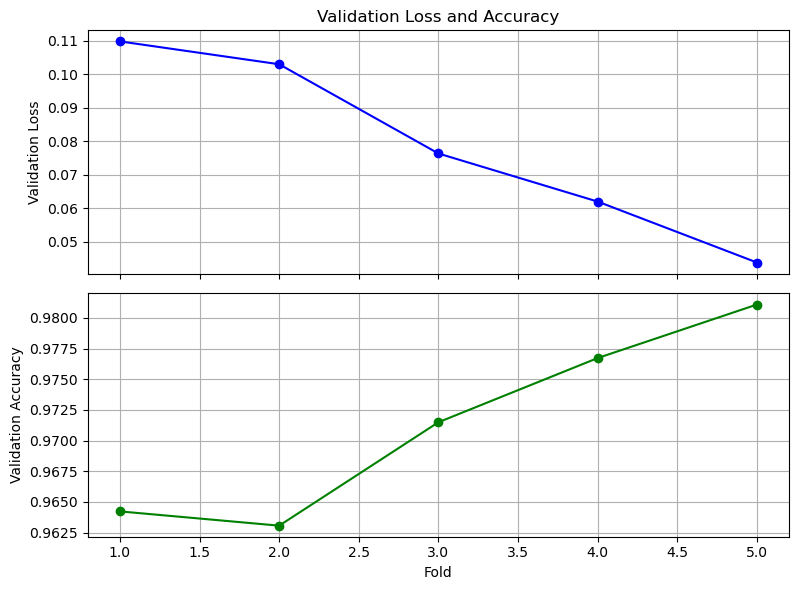

In [65]:
# plotting
plot_validation_metrics(val_losses, val_accs)
# saving losses and accs history for comparision in the future
append_to_val_dict(65, val_losses, val_accs)

학습 완료된 경우 바로 스프레드시트에 적어주세요!
한 데이터셋에 너무 시간을 많이 쓰실 필요는 없습니다. 학습할 내용도 많고 다른 모델도 많이 테스트해봐야 해요.
그리고 학습은 각 데이터셋에 대해 시간이 어느정도 소요되기 때문에 학습 과정에서는 다른 공부 하시는걸 추천드립니다.

In [67]:
print(val_losses)
print(val_accs)
val_dict

[0.10982047766447067, 0.10299540311098099, 0.07634427398443222, 0.061980895698070526, 0.04378343001008034]
[0.9642233848571777, 0.9630599021911621, 0.9714950323104858, 0.9767306447029114, 0.9810936450958252]


{65: ([0.10982047766447067,
   0.10299540311098099,
   0.07634427398443222,
   0.061980895698070526,
   0.04378343001008034],
  [0.9642233848571777,
   0.9630599021911621,
   0.9714950323104858,
   0.9767306447029114,
   0.9810936450958252])}

In [71]:
import csv
import os

data = {
    65: ([0.10982047766447067,
          0.10299540311098099,
          0.07634427398443222,
          0.061980895698070526,
          0.04378343001008034],
         [0.9642233848571777,
          0.9630599021911621,
          0.9714950323104858,
          0.9767306447029114,
          0.9810936450958252]),
    30: ([0.10982047766447067,
          0.10299540311098099,
          0.07634427398443222,
          0.061980895698070526,
          0.04378343001008034],
         [0.9642233848571777,
          0.9630599021911621,
          0.9714950323104858,
          0.9767306447029114,
          0.9810936450958252])
}

# CSV 파일에 저장할 데이터 준비
csv_data = []
for key, (val1, val2) in data.items():
    csv_data.append([key] + val1 + val2)

# 파일 저장 경로
csv_file_path = "output.csv"

# CSV 파일에 저장
file_exists = os.path.isfile(csv_file_path)

with open(csv_file_path, 'a', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    if not file_exists:
        # 헤더 추가
        header = ['index', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'mean_fold', 'acc1', 'acc2', 'acc3', 'acc4', 'acc5', 'mean_acc']
        csvwriter.writerow(header)
    for row in csv_data:
        csvwriter.writerow(row)

print(f"Data has been appended to {csv_file_path}")


Data has been appended to output.csv


In [55]:

motercondition1 = [0.6831934452056885,0.5378007888793945,0.1797906756401062,0.08078231662511826,0.04564619064331055,0.5732247233390808,0.756822407245636,0.9421346187591553,0.9825689196586609,0.9931418895721436]
motercondition2 = [2.035984754562378,0.20496614277362823,0.008051062002778053,7.296039257198572e-05,6.700340600218624e-05,0.5756013989448547,0.9226804375648499,0.9982817769050598,1.0,1.0]

folder = "figure"
name = " Moter Condition 1"
loss = motercondition1[:5]
acc = motercondition1[5:]
print(loss)
print(acc)
plot_validation_metrics(folder, name, loss, acc)

name = " Moter Condition 2"
loss = motercondition2[:5]
acc = motercondition2[5:]
plot_validation_metrics(folder, name, loss, acc)
print(loss)
print(acc)


[0.6831934452056885, 0.5378007888793945, 0.1797906756401062, 0.08078231662511826, 0.04564619064331055]
[0.5732247233390808, 0.756822407245636, 0.9421346187591553, 0.9825689196586609, 0.9931418895721436]
[2.035984754562378, 0.20496614277362823, 0.008051062002778053, 7.296039257198572e-05, 6.700340600218624e-05]
[0.5756013989448547, 0.9226804375648499, 0.9982817769050598, 1.0, 1.0]


In [ ]:
import csv
import os

data = {
    65: ([0.10982047766447067,
          0.10299540311098099,
          0.07634427398443222,
          0.061980895698070526,
          0.04378343001008034],
         [0.9642233848571777,
          0.9630599021911621,
          0.9714950323104858,
          0.9767306447029114,
          0.9810936450958252]),
    30: ([0.10982047766447067,
          0.10299540311098099,
          0.07634427398443222,
          0.061980895698070526,
          0.04378343001008034],
         [0.9642233848571777,
          0.9630599021911621,
          0.9714950323104858,
          0.9767306447029114,
          0.9810936450958252])
}

# CSV 파일에 저장할 데이터 준비
csv_data = []
for key, (val1, val2) in data.items():
    csv_data.append([key] + val1 + val2)

# 파일 저장 경로
csv_file_path = "output.csv"

# CSV 파일에 저장
file_exists = os.path.isfile(csv_file_path)

with open(csv_file_path, 'a', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    if not file_exists:
        # 헤더 추가
        header = ['index', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'mean_fold', 'acc1', 'acc2', 'acc3', 'acc4', 'acc5', 'mean_acc']
        csvwriter.writerow(header)
    for row in csv_data:
        csvwriter.writerow(row)

print(f"Data has been appended to {csv_file_path}")


Data has been appended to output.csv


In [ ]:

motercondition1 = [0.6831934452056885,0.5378007888793945,0.1797906756401062,0.08078231662511826,0.04564619064331055,0.5732247233390808,0.756822407245636,0.9421346187591553,0.9825689196586609,0.9931418895721436]
motercondition2 = [2.035984754562378,0.20496614277362823,0.008051062002778053,7.296039257198572e-05,6.700340600218624e-05,0.5756013989448547,0.9226804375648499,0.9982817769050598,1.0,1.0]

folder = "figure"
name = " Moter Condition 1"
loss = motercondition1[:5]
acc = motercondition1[5:]
print(loss)
print(acc)
plot_validation_metrics(folder, name, loss, acc)

name = " Moter Condition 2"
loss = motercondition2[:5]
acc = motercondition2[5:]
plot_validation_metrics(folder, name, loss, acc)
print(loss)
print(acc)


[0.6831934452056885, 0.5378007888793945, 0.1797906756401062, 0.08078231662511826, 0.04564619064331055]
[0.5732247233390808, 0.756822407245636, 0.9421346187591553, 0.9825689196586609, 0.9931418895721436]
[2.035984754562378, 0.20496614277362823, 0.008051062002778053, 7.296039257198572e-05, 6.700340600218624e-05]
[0.5756013989448547, 0.9226804375648499, 0.9982817769050598, 1.0, 1.0]


In [64]:
import csv
import pandas as pd


file = "42_Motorcondition1.npz"
# f = file.split('_')
# g = file.split('.')
# search_index = int(f[0])

X_t, y_t = npz_to_csv(dataset_path + file)
anomaly_rate = get_anomaly_rate(y_t)
val_losses, val_accs = train_and_evaluate_gru(X_t, y_t)
    
    
    


(7001, 5, 3)

Epoch 1/30
219/219 [==============================] - 6s 7ms/step - loss: 0.6849 - accuracy: 0.5716 - val_loss: 0.6831 - val_accuracy: 0.5714
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5731 - accuracy: 0.6525 - val_loss: 3.2404 - val_accuracy: 0.5744
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0112 - accuracy: 0.9980 - val_loss: 3.7261 - val_accuracy: 0.5721
Epoch 4/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0095 - accuracy: 0.9981 - val_loss: 3.7096 - val_accuracy: 0.5721
Epoch 5/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0075 - accuracy: 0.9989 - val_loss: 3.7610 - val_accuracy: 0.5721
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0078 - accuracy: 0.9989 - val_loss: 3.6080 - val_accuracy: 0.5717
Epoch 7/30
219/219 [==============================] - 1s 3ms/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 3.6483 - val_accuracy: 0.5717
Epoch 

/Users/seyeong/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(14000, 5, 3)

Epoch 1/30
438/438 [==============================] - 4s 4ms/step - loss: 0.6838 - accuracy: 0.5712 - val_loss: 0.6817 - val_accuracy: 0.5709
Epoch 2/30
438/438 [==============================] - 1s 2ms/step - loss: 0.6824 - accuracy: 0.5715 - val_loss: 0.6812 - val_accuracy: 0.5709
Epoch 3/30
438/438 [==============================] - 1s 2ms/step - loss: 0.5707 - accuracy: 0.7068 - val_loss: 0.7088 - val_accuracy: 0.5825
Epoch 4/30
438/438 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.7842 - val_loss: 0.7144 - val_accuracy: 0.5869
Epoch 5/30
438/438 [==============================] - 1s 3ms/step - loss: 0.4607 - accuracy: 0.7849 - val_loss: 0.7175 - val_accuracy: 0.5811
Epoch 6/30
438/438 [==============================] - 2s 3ms/step - loss: 0.4564 - accuracy: 0.7853 - val_loss: 0.6730 - val_accuracy: 0.5897
Epoch 7/30
438/438 [==============================] - 1s 3ms/step - loss: 0.4502 - accuracy: 0.7876 - val_loss: 0.7123 - val_accuracy: 0.5888
Epoch 

KeyboardInterrupt: 